# 2.1 Merging EPC with LBSM (Domestic Buildings)

<hr style="border:2px solid black">

# Outline <a id='index'></a>
1. [Introduction](#1)
1. [Data Visualization and Cleaning](#2)
    * [2.1 Categorical Data Analysis](#2.1)
    * [2.2 Continous Data Analysis](#2.2)
1. [Convert categorical to numerical](#3)
1. [Conclusion](#4)


<hr style="border:2px solid BLACK">

# 1. Introduction [^](#index) <a name="1"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Firstly, in this notebook, we will filter years from the EPC data (the initial year is from 
2017 until 2023), as some data from other years may be included in the original dataset.
Later, the dataset from EPC is merged with data from the London Building Stock Model(LBSM).
LBSM has more detailed data on spatial features, such as the height and gross external area (SCU Footprint)for each unit.
The common feature to merge these two datasets is the Unique Property Reference Number (UPRN), 
which is a unique ID for each 
unit of an apartment or a house.
Following the merge, we embark on a comprehensive process of visualizing and cleaning the NAN values. 
This meticulous process, based on the data type (categorical, discrete, or continuous), ensures that we maintain
the highest data quality. Most of these NAN values are identified in the LBSM data post-merge, and our 
thorough cleaning process ensures that our data is reliable and accurate. Finally, the dataset is saved into two 
separate files, namely 2.1_DOM_1723.csv (containing 1.3 million data points approximately) and 2.1_Dom_1723_LBSM_25k.csv
(containing 25000 data points). A file with 25000 data points
is used for further analysis to reduce computational efficiency and save more time.<div>

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
cert= '/home/ffs223/Downloads/GHGs_coding/DOM_Main code/Job Portfolio/MRES_Project/1.1_Dom_1423_EPC.csv'
cert_df=pd.read_csv(cert)
cert_df

,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,year,...,MAINHEAT_ENERGY_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENV_EFF,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,HEATING_COST_CURRENT,LIGHTING_COST_CURRENT,NUMBER_HABITABLE_ROOMS_bin,NUMBER_HEATED_ROOMS_bin
0,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,374.0,47.0,Greater than 50,Greater than 50
1,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,Semi-Detached,2022.0,...,Good,Community scheme,Good,Community scheme,Good,Good,258.0,119.0,Greater than 50,Greater than 50
2,189637da5cc47f86d824c37663194e1f2a28e3ee5654b1...,34 Mitcham Road,10003448733,E6 3LU,Rented (private),4.605080e+07,Energy Assessor,House,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,675.0,84.0,41-50,11-20
3,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,297.0,70.0,Greater than 50,Greater than 50
4,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,289.0,56.0,Greater than 50,Greater than 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422546,010999bf35108420464e5ea48e40b9a624492ceae6e69d...,Flat 9,10002935381,IG6 1RA,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,311.0,101.0,31-40,Greater than 50
2422547,00fede183e28ba0b6e3868de003f227fdfa0a7b616c0ba...,251 Maybank Road,10002733331,E18 1ER,Owner-occupied,1.000223e+11,Energy Assessor,House,Semi-Detached,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,676.0,65.0,Greater than 50,5-6
2422548,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,405.0,44.0,Greater than 50,41-50
2422549,006da7fc42ee9e7c3c8d023ad6eadda2a506fc1e811a1c...,18 Palmer Road,10002625957,RM8 1TD,Owner-occupied,1.000222e+11,Energy Assessor,House,Mid-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,263.0,53.0,Greater than 50,Greater than 50


In [3]:
cert_df.columns

Index(['LMK_KEY', 'ADDRESS1', 'BUILDING_REFERENCE_NUMBER', 'POSTCODE',
       'TENURE', 'UPRN', 'UPRN_SOURCE', 'PROPERTY_TYPE', 'BUILT_FORM', 'year',
       'INSPECTION_DATE', 'CO2_EMISSIONS_CURRENT', 'CURRENT_ENERGY_RATING',
       'CURRENT_ENERGY_EFFICIENCY', 'ENERGY_CONSUMPTION_CURRENT',
       'CO2_EMISS_CURR_PER_FLOOR_AREA', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF',
       'MAINS_GAS_FLAG', 'FLOOR_LEVEL', 'MULTI_GLAZE_PROPORTION',
       'TRANSACTION_TYPE', 'GLAZED_AREA', 'EXTENSION_COUNT',
       'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS', 'FLOOR_DESCRIPTION',
       'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF',
       'WALLS_DESCRIPTION', 'WALLS_ENERGY_EFF', 'WALLS_ENV_EFF',
       'ROOF_DESCRIPTION', 'MAIN_FUEL', 'CONSTRUCTION_AGE_BAND',
       'ENVIRONMENT_IMPACT_CURRENT', 'SOLAR_WATER_HEATING_FLAG',
       'MECHANICAL_VENTILATION', 'LIGHTING_ENV_EFF', 'LIGHTING_ENERGY_EFF',
       'LIGHTING_DESCRIPTION', 'MAINHEATC_ENV_EFF', 'MAINHEAT_ENERGY_EFF',
       'MA

In [13]:
new_yr_2020 = cert_df[cert_df['year'] == 2017] #Inspect total number of unique UPRN by year
new_yr_2020

,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,year,...,LIGHTING_DESCRIPTION,MAINHEATC_ENV_EFF,MAINHEAT_ENERGY_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENV_EFF,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,HEATING_COST_CURRENT,LIGHTING_COST_CURRENT
11,1547926446612017053000460990230959,"30, Kildare Road",9959602578,E16 4AD,rental (private),4.604217e+07,Address Matched,House,Mid-Terrace,2017.0,...,Low energy lighting in 50% of fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,562.0,91.0
16,1514197809222017012622124639958223,"386, Central Park Road",2332079478,E6 3AB,rental (private),4.601274e+07,Address Matched,House,Mid-Terrace,2017.0,...,Low energy lighting in 38% of fixed outlets,Very Poor,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,673.0,102.0
19,1557354323332017070518581711078406,"144, Mitcham Road",2661472578,E6 3NF,owner-occupied,4.605091e+07,Address Matched,House,Mid-Terrace,2017.0,...,No low energy lighting,Very Poor,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,655.0,97.0
60,1110317557332017032418534549278404,"93, Whitwell Road",5409411278,E13 8DA,owner-occupied,4.608025e+07,Address Matched,Maisonette,Mid-Terrace,2017.0,...,Low energy lighting in all fixed outlets,Average,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,499.0,64.0
62,613978908332017082810241543068803,"109, Bluebell Avenue",313855868,E12 6UL,rental (social),4.600629e+07,Address Matched,Flat,Semi-Detached,2017.0,...,No low energy lighting,Very Poor,Good,"Boiler and radiators, mains gas",Good,"From main system, no cylinder thermostat",Poor,Poor,446.0,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463090,1596876472332017121717262789978493,"71, Ley Street",7359455578,IG1 4BG,rental (private),1.000222e+11,Address Matched,House,Mid-Terrace,2017.0,...,Low energy lighting in 29% of fixed outlets,Very Poor,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,1056.0,124.0
1467943,941741488812017051920553291930808,Flat 25 Hermitage Court,8841819078,E18 2EW,rental (private),1.000223e+11,Address Matched,Flat,Mid-Terrace,2017.0,...,Low energy lighting in 44% of fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,530.0,64.0
1467949,876622469142017112020175103439688,"338, Ley Street",7183064078,IG1 4AF,rental (private),1.000222e+11,Address Matched,House,End-Terrace,2017.0,...,Low energy lighting in all fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,720.0,77.0
1467952,632863545332017052309320066968508,"18, Copper Beech Close",4866596868,IG5 0RX,owner-occupied,1.000222e+11,Address Matched,House,Semi-Detached,2017.0,...,Low energy lighting in 50% of fixed outlets,Good,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,492.0,83.0


In [5]:
# Select only years within LBSM data
new_yr  = cert_df[(cert_df['year'] >= 2017) & (cert_df['year'] <= 2023)]
new_yr.isnull().sum()

LMK_KEY                               0
ADDRESS1                              0
BUILDING_REFERENCE_NUMBER             0
POSTCODE                              0
TENURE                                0
UPRN                             103350
UPRN_SOURCE                           0
PROPERTY_TYPE                         0
BUILT_FORM                            0
year                                  0
INSPECTION_DATE                       0
CO2_EMISSIONS_CURRENT                 0
CURRENT_ENERGY_RATING                 0
CURRENT_ENERGY_EFFICIENCY             0
ENERGY_CONSUMPTION_CURRENT            0
CO2_EMISS_CURR_PER_FLOOR_AREA         0
TOTAL_FLOOR_AREA                      0
ENERGY_TARIFF                         0
MAINS_GAS_FLAG                        0
MULTI_GLAZE_PROPORTION                0
TRANSACTION_TYPE                      0
GLAZED_AREA                           0
EXTENSION_COUNT                       0
NUMBER_HABITABLE_ROOMS                0
NUMBER_HEATED_ROOMS                   0


In [6]:
new_yr

,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,year,...,MAINHEAT_ENERGY_EFF,MAINHEAT_DESCRIPTION,MAINHEAT_ENV_EFF,HOTWATER_DESCRIPTION,HOT_WATER_ENERGY_EFF,HOT_WATER_ENV_EFF,HEATING_COST_CURRENT,LIGHTING_COST_CURRENT,NUMBER_HABITABLE_ROOMS_bin,NUMBER_HEATED_ROOMS_bin
0,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,374.0,47.0,Greater than 50,Greater than 50
1,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,Semi-Detached,2022.0,...,Good,Community scheme,Good,Community scheme,Good,Good,258.0,119.0,Greater than 50,Greater than 50
2,189637da5cc47f86d824c37663194e1f2a28e3ee5654b1...,34 Mitcham Road,10003448733,E6 3LU,Rented (private),4.605080e+07,Energy Assessor,House,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,675.0,84.0,41-50,11-20
3,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,297.0,70.0,Greater than 50,Greater than 50
4,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,289.0,56.0,Greater than 50,Greater than 50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2422546,010999bf35108420464e5ea48e40b9a624492ceae6e69d...,Flat 9,10002935381,IG6 1RA,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,311.0,101.0,31-40,Greater than 50
2422547,00fede183e28ba0b6e3868de003f227fdfa0a7b616c0ba...,251 Maybank Road,10002733331,E18 1ER,Owner-occupied,1.000223e+11,Energy Assessor,House,Semi-Detached,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,676.0,65.0,Greater than 50,5-6
2422548,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,405.0,44.0,Greater than 50,41-50
2422549,006da7fc42ee9e7c3c8d023ad6eadda2a506fc1e811a1c...,18 Palmer Road,10002625957,RM8 1TD,Owner-occupied,1.000222e+11,Energy Assessor,House,Mid-Terrace,2022.0,...,Good,"Boiler and radiators, mains gas",Good,From main system,Good,Good,263.0,53.0,Greater than 50,Greater than 50


<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Below is the cell, reading data from LBSM.LBSM has 4.7 mill data points of spatial 
features with 43 features such as 
easting,northing, latitude,longitude, height of a building, Census output area (OA) and others.<div>

In [7]:
lbsm= '/home/ffs223/Downloads/GHGs_coding/DOM_Main code/Job Portfolio/LBSM_All_London.csv'
lbsm_df=pd.read_csv(lbsm)
lbsm_df

/tmp/ipykernel_6464/750639352.py:2: DtypeWarning: Columns (22,23,26,28,32,34,36,38,40,42) have mixed types. Specify dtype option on import or set low_memory=False.
  lbsm_df=pd.read_csv(lbsm)


,UPRN,SCU_ID,OS_TOPO_TOID,EASTING,NORTHING,LATITUDE,LONGITUDE,OA,LSOA,MSOA,...,AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT,AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA
0,95510923,5.030100e+13,osgb1000005894597,532123.00,182028.00,51.521725,-0.096998,E00000010,E01000003,E02000001,...,NaN,NaN,NaN,NaN,NaN,NaN,54.0,E,NaN,NaN
1,100023615843,5.030100e+13,osgb1000005894597,532115.00,182025.00,51.521700,-0.097115,E00000010,E01000003,E02000001,...,NaN,NaN,NaN,NaN,NaN,NaN,54.0,E,NaN,NaN
2,200000071748,5.030100e+13,osgb1000005894760,532193.00,182074.00,51.522122,-0.095973,E00000012,E01000003,E02000001,...,63.0,D,71.0,C,70.0,C,63.0,D,63.0,D
3,200000071808,5.030100e+13,osgb1000005894760,532193.00,182074.00,51.522122,-0.095973,E00000012,E01000003,E02000001,...,63.0,D,71.0,C,70.0,C,63.0,D,63.0,D
4,200000071807,5.030100e+13,osgb1000005894760,532193.00,182074.00,51.522122,-0.095973,E00000012,E01000003,E02000001,...,63.0,D,71.0,C,70.0,C,63.0,D,63.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4710938,10092984018,NaN,osgb5000005209443103,511128.51,185534.95,51.557762,-0.398365,E00012429,E01002497,E02006796,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4710939,6041780,NaN,osgb1000041691013,535996.00,183413.00,51.533252,-0.040674,E00021312,E01004234,E02000866,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4710940,10025698549,NaN,osgb5000005214105008,529149.52,192466.94,51.616224,-0.136000,E00007613,E01001534,E02000308,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4710941,6160138,NaN,osgb5000005267263349,537621.77,179724.87,51.499716,-0.018689,E00167132,E01032772,E02006853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
lbsm_df.columns

Index(['UPRN', 'SCU_ID', 'OS_TOPO_TOID', 'EASTING', 'NORTHING', 'LATITUDE',
       'LONGITUDE', 'OA', 'LSOA', 'MSOA', 'OAC', 'WARD_CODE', 'WARD',
       'ADMINISTRATIVE_AREA', 'ESTIMATED_FLOOR_COUNT',
       'ESTIMATE_TOTAL_FLOOR_AREA_ALL', 'SCU_FOOTPRINT',
       'MEAN_OBJECT_HEIGHT_M', 'BASEMENT_FLOOR', 'COUNT_D_UPRNS',
       'COUNT_ND_UPRNS', 'MIX_CLASS', 'DOMINANT_ND_ACTIVITY_BY_C2_FS',
       'DOMINANT_ND_ACTIVITY_BY_C2_COUNT', 'DEC_COUNT',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA',
       'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA',
       'EPC_RATING_COUNT_DOM', 'EPC_RATING_COUNT_NONDOM',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',
       'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT',
       'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',
       'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_B

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;After merging, the total data points are 1.59 million rows with 93 columns.
The similar column from both data is UPRN. Thus, both data is merge though UPRN feature.<div>

In [8]:
merged= pd.merge(new_yr, lbsm_df, on="UPRN", how="inner")
merged

,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,year,...,AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT,AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT,AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA
0,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,81.0,B,NaN,NaN
1,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,Semi-Detached,2022.0,...,81.0,B,79.0,C,80.0,C,79.0,C,81.0,B
2,189637da5cc47f86d824c37663194e1f2a28e3ee5654b1...,34 Mitcham Road,10003448733,E6 3LU,Rented (private),4.605080e+07,Energy Assessor,House,End-Terrace,2022.0,...,44.0,E,62.0,D,62.0,D,44.0,E,44.0,E
3,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,End-Terrace,2022.0,...,68.0,D,71.0,C,72.0,C,67.0,D,68.0,D
4,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,64.0,D,77.0,C,77.0,C,65.0,D,64.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593324,01115f38b4b3c063d210222231dbaec008b88e0557cb86...,199 Buckhurst Way,10002685845,IG9 6JB,Owner-occupied,1.000222e+11,Energy Assessor,House,End-Terrace,2022.0,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,D,NaN,NaN
1593325,00fede183e28ba0b6e3868de003f227fdfa0a7b616c0ba...,251 Maybank Road,10002733331,E18 1ER,Owner-occupied,1.000223e+11,Energy Assessor,House,Semi-Detached,2022.0,...,45.0,E,61.0,D,61.0,D,45.0,E,45.0,E
1593326,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,62.0,D,72.0,C,72.0,C,63.0,D,62.0,D
1593327,006da7fc42ee9e7c3c8d023ad6eadda2a506fc1e811a1c...,18 Palmer Road,10002625957,RM8 1TD,Owner-occupied,1.000222e+11,Energy Assessor,House,Mid-Terrace,2022.0,...,72.0,C,74.0,C,73.0,C,73.0,C,72.0,C


In [9]:
#Checking for NAN values
Nan=merged.isnull()

for column in Nan.columns.values.tolist():
    print(column)
    print (Nan[column].value_counts())
    print("") 

LMK_KEY
LMK_KEY
False    1593329
Name: count, dtype: int64

ADDRESS1
ADDRESS1
False    1593329
Name: count, dtype: int64

BUILDING_REFERENCE_NUMBER
BUILDING_REFERENCE_NUMBER
False    1593329
Name: count, dtype: int64

POSTCODE
POSTCODE
False    1593329
Name: count, dtype: int64

TENURE
TENURE
False    1593329
Name: count, dtype: int64

UPRN
UPRN
False    1593329
Name: count, dtype: int64

UPRN_SOURCE
UPRN_SOURCE
False    1593329
Name: count, dtype: int64

PROPERTY_TYPE
PROPERTY_TYPE
False    1593329
Name: count, dtype: int64

BUILT_FORM
BUILT_FORM
False    1593329
Name: count, dtype: int64

year
year
False    1593329
Name: count, dtype: int64

INSPECTION_DATE
INSPECTION_DATE
False    1593329
Name: count, dtype: int64

CO2_EMISSIONS_CURRENT
CO2_EMISSIONS_CURRENT
False    1593329
Name: count, dtype: int64

CURRENT_ENERGY_RATING
CURRENT_ENERGY_RATING
False    1593329
Name: count, dtype: int64

CURRENT_ENERGY_EFFICIENCY
CURRENT_ENERGY_EFFICIENCY
False    1593329
Name: count, dtype: int64



In [10]:
nan= { 
    'SCU_ID':211669,'OA':602,'LSOA':602,'MSOA':602,'OAC':602,
    'WARD_CODE':602,'WARD':602,'ESTIMATED_FLOOR_COUNT':250447,
    'ESTIMATE_TOTAL_FLOOR_AREA_ALL':244047,'SCU_FOOTPRINT':244047,
    'MEAN_OBJECT_HEIGHT_M':246697,'BASEMENT_FLOOR':1509831,
    'COUNT_D_UPRNS':266380,'COUNT_ND_UPRNS':1403467,'MIX_CLASS':276122,
    
    'DOMINANT_ND_ACTIVITY_BY_C2_FS':1422847,
    'DOMINANT_ND_ACTIVITY_BY_C2_COUNT':1414778,
    
'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT':1591699,
   'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT':1591699,
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA':1591699,
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA':1591699,
    
  'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT':685911,
'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT ':685911,
   'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA': 692071,
    'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA':692071,
    
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT':697641,
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT':697641,
    'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA':703873,
    'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA':703873,
    
    'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT':251022,
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT':251022,
    'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA':666014,
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA':666014,
    

                                    
    }

nan_dom = pd.DataFrame(list(nan.items()), columns=['Column', 'NaN_Count'])#convert nan list into data frame:create col in the df

nan_dom

,Column,NaN_Count
0,SCU_ID,211669
1,OA,602
2,LSOA,602
3,MSOA,602
4,OAC,602
5,WARD_CODE,602
6,WARD,602
7,ESTIMATED_FLOOR_COUNT,250447
8,ESTIMATE_TOTAL_FLOOR_AREA_ALL,244047
9,SCU_FOOTPRINT,244047


In [11]:
def plot_nan(nan_df, total_rows, title,colour=None):

    # Calculate the % of NaN values
    nan_df['NaN_%'] = (nan_df['NaN_Count'] / total_rows) * 100
    
    # Plotting
    plt.figure(figsize=(5, 3), dpi=500)
    bars = plt.barh(nan_df['Column'], nan_df['NaN_%'], color=colour)
    plt.xlabel('Percentage of NaN values',fontsize=8)
    plt.title(title, fontsize=10)
    plt.grid(axis='x')
    plt.yticks(fontsize=5)
    plt.xticks(fontsize=6)

    # Display values at the side of the bar
    for bar in bars:
        w = bar.get_width()
        label = f'{w:.1f}%'
        plt.text(w + 0.5, bar.get_y() + bar.get_height() / 2, label, va='center', fontsize=6, color='black')

   
    plt.show()

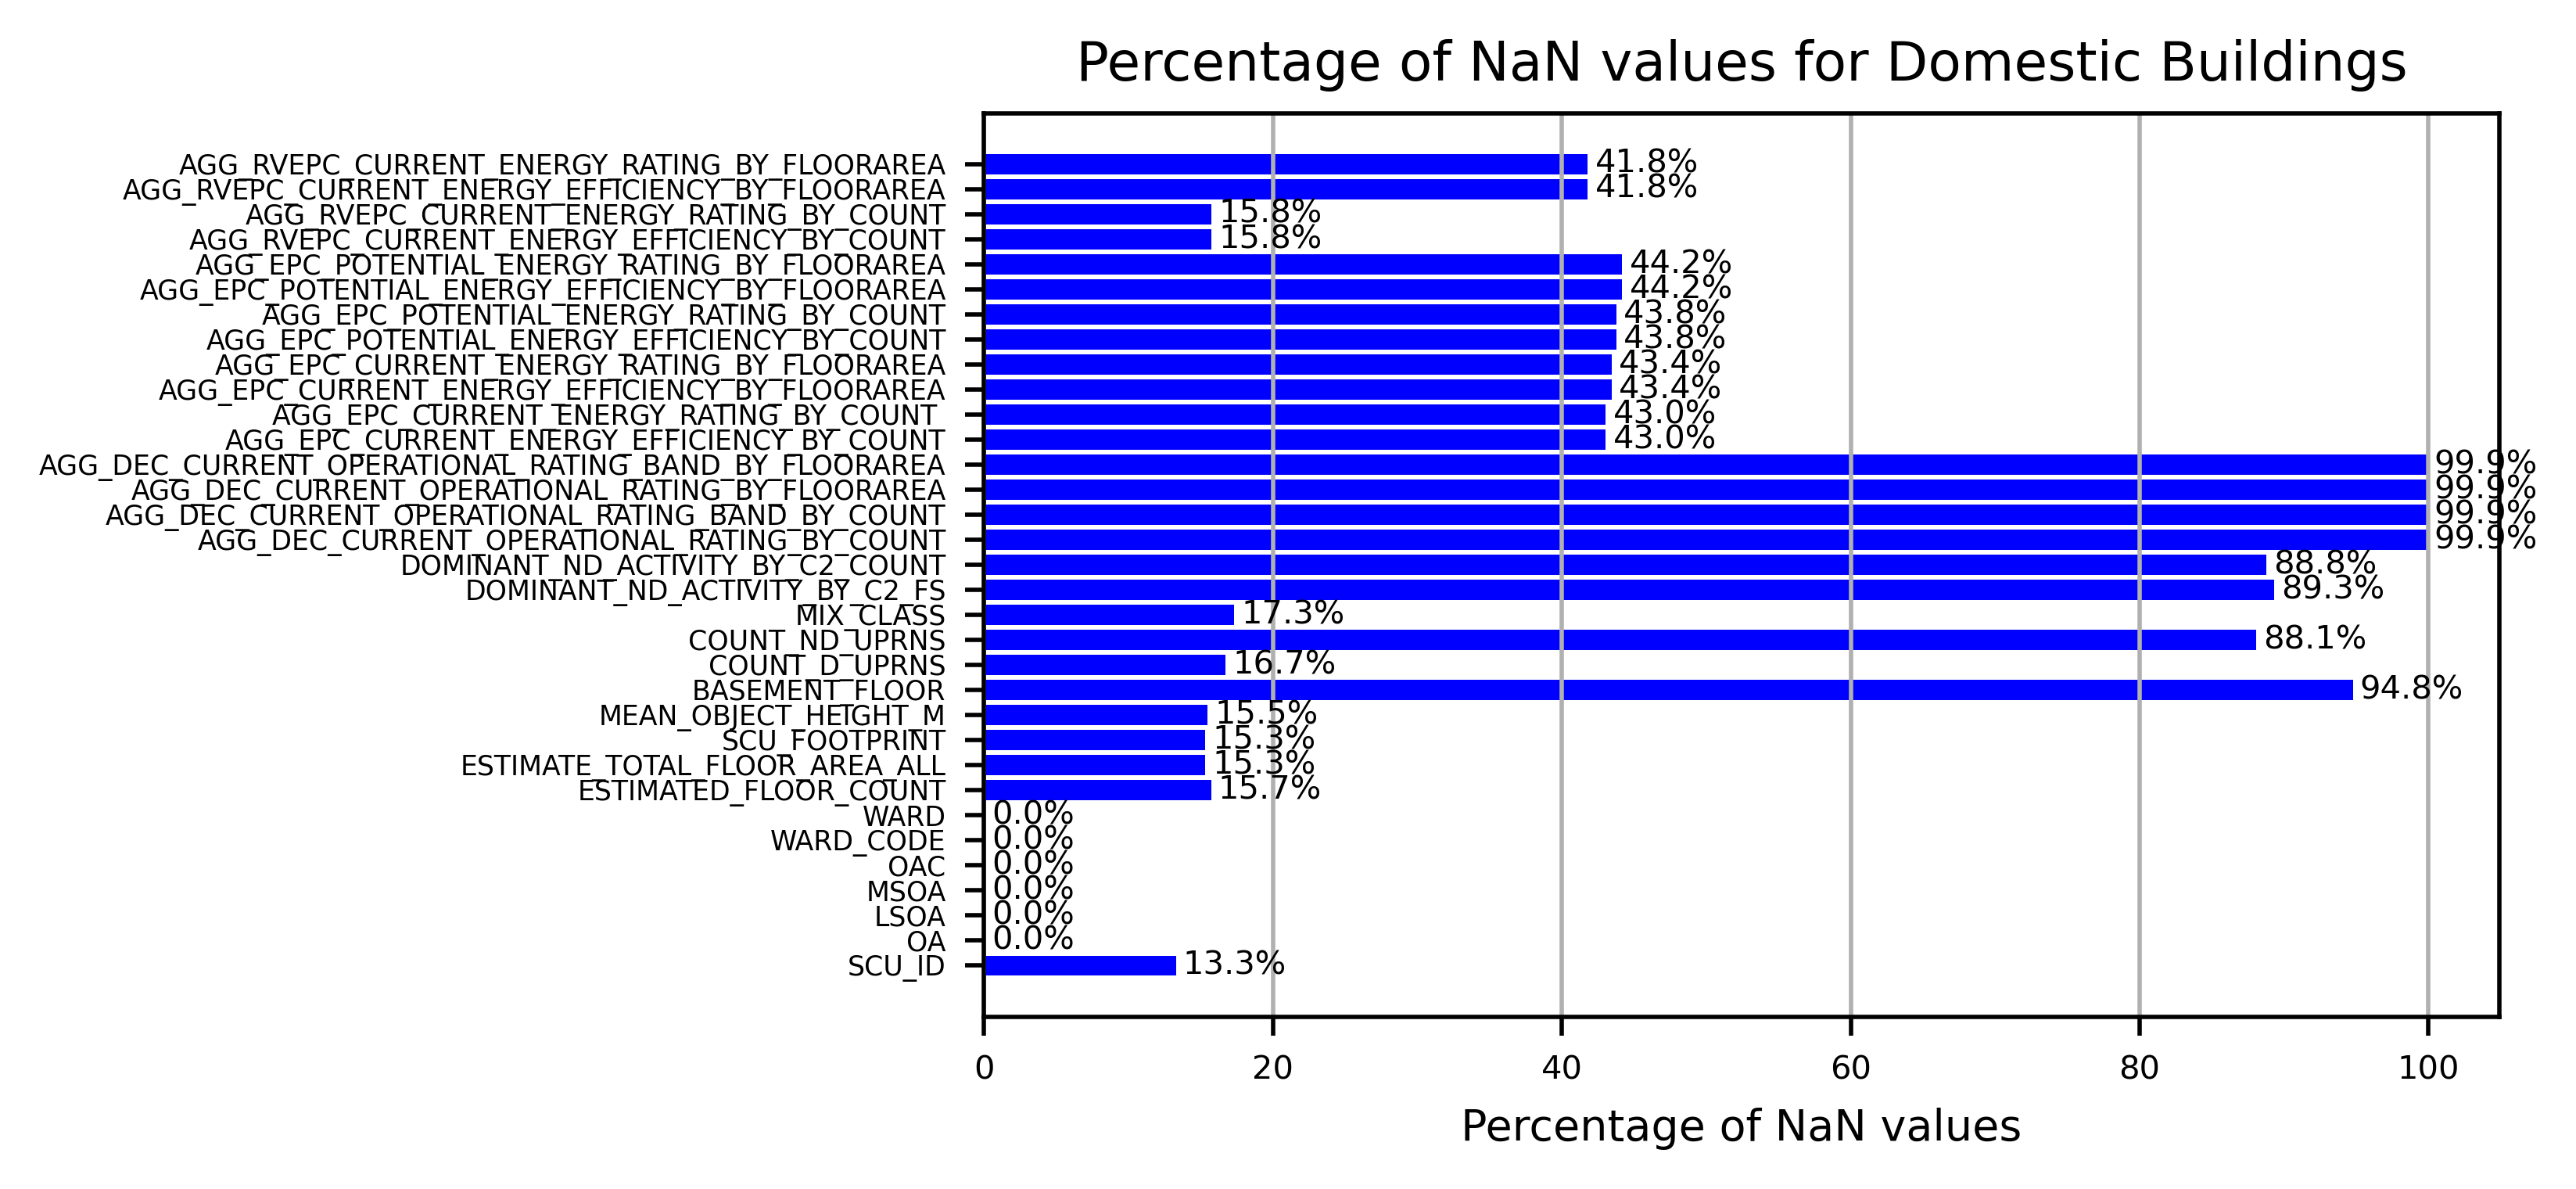

In [12]:
plot_nan(nan_dom, 1593329, 'Percentage of NaN values for Domestic Buildings','blue')

In [13]:
val = nan_dom[nan_dom['NaN_%'] > 40]
print(val)

                                               Column  NaN_Count      NaN_%
11                                     BASEMENT_FLOOR    1509831  94.759525
13                                     COUNT_ND_UPRNS    1403467  88.083942
15                      DOMINANT_ND_ACTIVITY_BY_C2_FS    1422847  89.300264
16                   DOMINANT_ND_ACTIVITY_BY_C2_COUNT    1414778  88.793840
17        AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT    1591699  99.897698
18   AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT    1591699  99.897698
19    AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA    1591699  99.897698
20  AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLO...    1591699  99.897698
21         AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT     685911  43.048925
22            AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT      685911  43.048925
23     AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA     692071  43.435537
24         AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA     692071  43.435537
25       AGG

In [14]:
drop=[
    'BASEMENT_FLOOR','COUNT_ND_UPRNS', 'EPC_RATING_COUNT_NONDOM',   
    'DOMINANT_ND_ACTIVITY_BY_C2_FS','DOMINANT_ND_ACTIVITY_BY_C2_COUNT',    
        'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_COUNT',    
  'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_COUNT',    
    'AGG_DEC_CURRENT_OPERATIONAL_RATING_BY_FLOORAREA',    
  'AGG_DEC_CURRENT_OPERATIONAL_RATING_BAND_BY_FLOORAREA',    
         'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT',     
            'AGG_EPC_CURRENT_ENERGY_RATING_BY_COUNT',      
     'AGG_EPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',     
         'AGG_EPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',     
       'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_COUNT',     
           'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_COUNT',     
   'AGG_EPC_POTENTIAL_ENERGY_EFFICIENCY_BY_FLOORAREA',    
      'AGG_EPC_POTENTIAL_ENERGY_RATING_BY_FLOORAREA',     
   'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_FLOORAREA',     
       'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_FLOORAREA',
     ]

merged.drop(columns=drop,axis=1,inplace=True)

In [15]:
merged.columns

Index(['LMK_KEY', 'ADDRESS1', 'BUILDING_REFERENCE_NUMBER', 'POSTCODE',
       'TENURE', 'UPRN', 'UPRN_SOURCE', 'PROPERTY_TYPE', 'BUILT_FORM', 'year',
       'INSPECTION_DATE', 'CO2_EMISSIONS_CURRENT', 'CURRENT_ENERGY_RATING',
       'CURRENT_ENERGY_EFFICIENCY', 'ENERGY_CONSUMPTION_CURRENT',
       'CO2_EMISS_CURR_PER_FLOOR_AREA', 'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF',
       'MAINS_GAS_FLAG', 'MULTI_GLAZE_PROPORTION', 'TRANSACTION_TYPE',
       'GLAZED_AREA', 'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS',
       'NUMBER_HEATED_ROOMS', 'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION',
       'WINDOWS_ENERGY_EFF', 'WINDOWS_ENV_EFF', 'WALLS_DESCRIPTION',
       'WALLS_ENERGY_EFF', 'WALLS_ENV_EFF', 'ROOF_DESCRIPTION', 'MAIN_FUEL',
       'CONSTRUCTION_AGE_BAND', 'ENVIRONMENT_IMPACT_CURRENT',
       'SOLAR_WATER_HEATING_FLAG', 'MECHANICAL_VENTILATION',
       'LIGHTING_ENV_EFF', 'LIGHTING_ENERGY_EFF', 'LIGHTING_DESCRIPTION',
       'MAINHEAT_ENERGY_EFF', 'MAINHEAT_DESCRIPTION', 'MAINHEAT_ENV_EFF',
  

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;The code in the cell below is to rearrange the position of the target variable which is the energy consumption as the first column. 

In [7]:
cols = merged.columns.tolist()

# Rearrange the position of ENERGY_CONSUMPTION_CURRENT column
cols.insert(0, cols.pop(cols.index('ENERGY_CONSUMPTION_CURRENT')))

# Display the latest arrangement 
merged = merged[cols]
merged

,ENERGY_CONSUMPTION_CURRENT,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,...,ESTIMATED_FLOOR_COUNT,ESTIMATE_TOTAL_FLOOR_AREA_ALL,SCU_FOOTPRINT,MEAN_OBJECT_HEIGHT_M,COUNT_D_UPRNS,MIX_CLASS,DEC_COUNT,EPC_RATING_COUNT_DOM,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT
0,242,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,Mid-Terrace,...,2.0,124.00,73.50,5.90,2.0,9.0,0,0,81.0,B
1,101,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,Semi-Detached,...,5.0,1960.61,696.08,13.82,105.0,7.0,0,22,79.0,C
2,225,189637da5cc47f86d824c37663194e1f2a28e3ee5654b1...,34 Mitcham Road,10003448733,E6 3LU,Rented (private),4.605080e+07,Energy Assessor,House,End-Terrace,...,2.0,106.00,76.59,5.18,1.0,10.0,0,1,44.0,E
3,168,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,End-Terrace,...,22.0,9818.00,487.72,56.61,123.0,8.0,0,34,67.0,D
4,209,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,Mid-Terrace,...,3.0,1436.00,500.75,8.88,18.0,8.0,0,13,65.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593324,244,01115f38b4b3c063d210222231dbaec008b88e0557cb86...,199 Buckhurst Way,10002685845,IG9 6JB,Owner-occupied,1.000222e+11,Energy Assessor,House,End-Terrace,...,2.0,79.00,37.98,7.25,1.0,10.0,0,0,58.0,D
1593325,289,00fede183e28ba0b6e3868de003f227fdfa0a7b616c0ba...,251 Maybank Road,10002733331,E18 1ER,Owner-occupied,1.000223e+11,Energy Assessor,House,Semi-Detached,...,2.0,93.00,51.75,6.12,1.0,10.0,0,1,45.0,E
1593326,258,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,...,3.0,262.55,71.55,10.82,4.0,9.0,0,5,63.0,D
1593327,144,006da7fc42ee9e7c3c8d023ad6eadda2a506fc1e811a1c...,18 Palmer Road,10002625957,RM8 1TD,Owner-occupied,1.000222e+11,Energy Assessor,House,Mid-Terrace,...,1.0,34.32,34.33,4.60,1.0,10.0,0,1,73.0,C


# 2. Data Visualization and Cleaning [^](#index) <a name="2"></a> 

### 2.1 Categorical Data Analysis [^](#index) <a name="2.1"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
Below is the list of the categorical data:
    

1. MAIN_FUEL
2. EXTENSION_COUNT
3. OA
4. LSOA
5. MSOA
6. OAC
7. WARD
8. WARD_CODE
9. AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT
10. COUNT
11. MIX_CLASS
12. COUNT_D_UPRN
13. ESTIMATED_FLOOR_COUNT


The above list is the categorical data types from LBSM, as categorical data from EPC has been cleaned in the previous
notebook.<div>


In [17]:
def DOM_categorical(df, thresholds=None, initial=1200, features=None, x_angle=90, x_font=10, fig=(10, 6), colour='brown'):
    """
    Plots the frequency distribution for categorical features with different range of threshold

    Parameters:
    - df: Dataframe for domestic buildings
    - thresholds: filter a list from list_thresh for specific feature as different features 
                   have different range of threshold.
    - initial: it is a default threshold for other features that have general range of threshold
    """
    if features:
        a = [features]
    else:
        a = df.select_dtypes(include=['object', 'category']).columns

    for col in a:
        counts = df[col].value_counts()

        # Checking the threshold value for the current feature
        if thresholds and col in thresholds:
            thresh = thresholds[col]
            if callable(thresh):
                z = counts[thresh(counts)]
            else:
                z = counts[counts > thresh]
        else:
            z = counts[counts > initial]

        if not z.empty:
            plt.figure(figsize=fig)
            plt.bar(z.index, z.values, color=colour, edgecolor='black')
            plt.title(f'Distribution of {col}')
            plt.xlabel(col)
            plt.ylabel('Frequency')
            plt.xticks(ticks=z.index, labels=z.index, rotation=x_angle, fontsize=x_font)
            #plt.xticks(range(0, len(z), max(1, len(z)//50)), z.index[::max(1, len(z)//50)], rotation=90, fontsize=x_font)
            plt.grid(False)
            plt.tight_layout()
            plt.show()
            
           
#Range of threshold for specific features
list_thresh = {
    'MSOA': lambda x: x > 3000,
    'OAC':lambda x: x > 3000,
    'WARD_CODE':lambda x: x > 3000,
    'WARD':lambda x: x > 4000,
    'AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT':lambda x: x > 100,
    'MIX_CLASS':lambda x: x > 3000,'SCU_ID':lambda x: x > 100,
    'ESTIMATED_FLOOR_COUNT':lambda x: x > 100
    
}




In [18]:
def median(df, feature):
    
    # Calculate the median and replace the NAN values from original dataframe
    med = df[feature].median()
    df.loc[:, feature] = df[feature].fillna(med)
    
    return df

/tmp/ipykernel_15824/1864792360.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


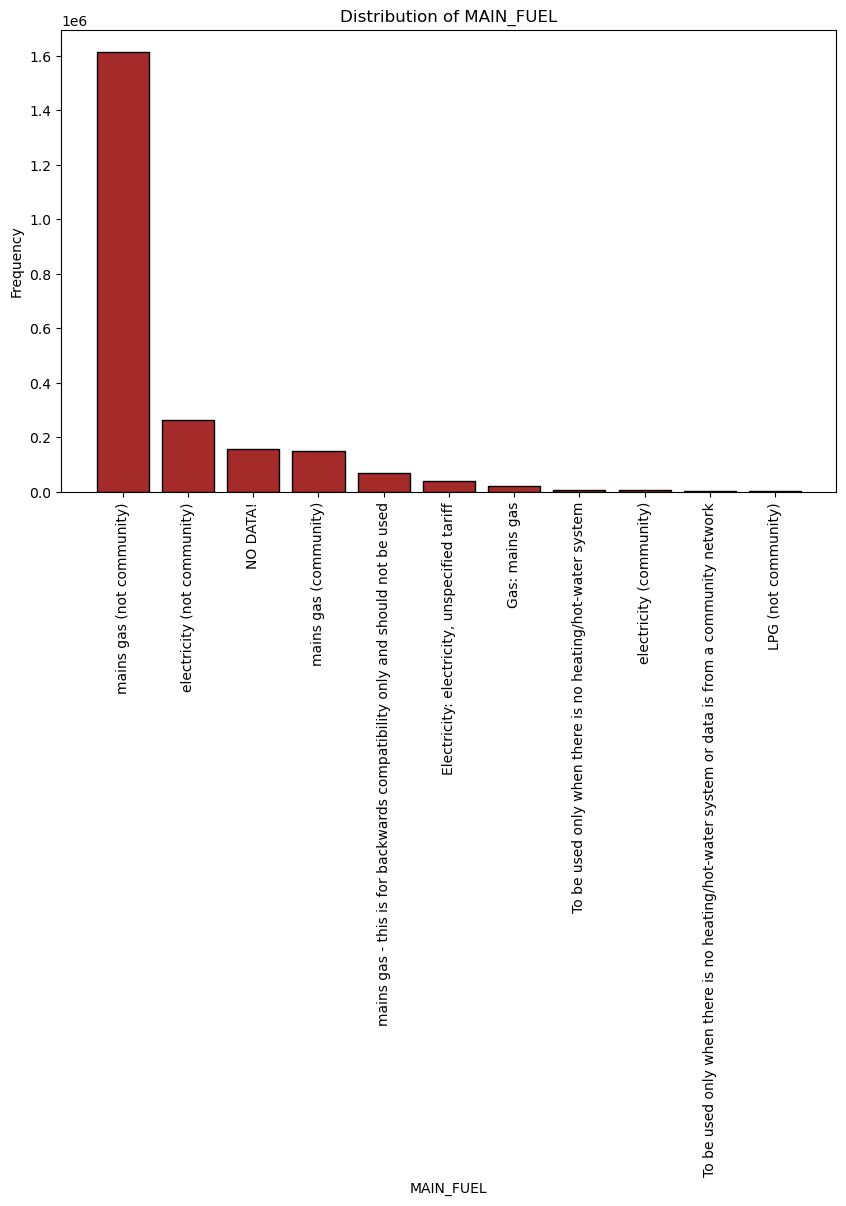

In [18]:
DOM_categorical(cert_df, thresholds=list_thresh, features='MAIN_FUEL')

In [19]:
merged['EXTENSION_COUNT'].value_counts()#.idxmax()
#merged['EXTENSION_COUNT']= merged['EXTENSION_COUNT'].replace(np.nan, "E00175033")

EXTENSION_COUNT
0.0    995036
1.0    282315
2.0     71703
3.0     16954
4.0      5375
Name: count, dtype: int64

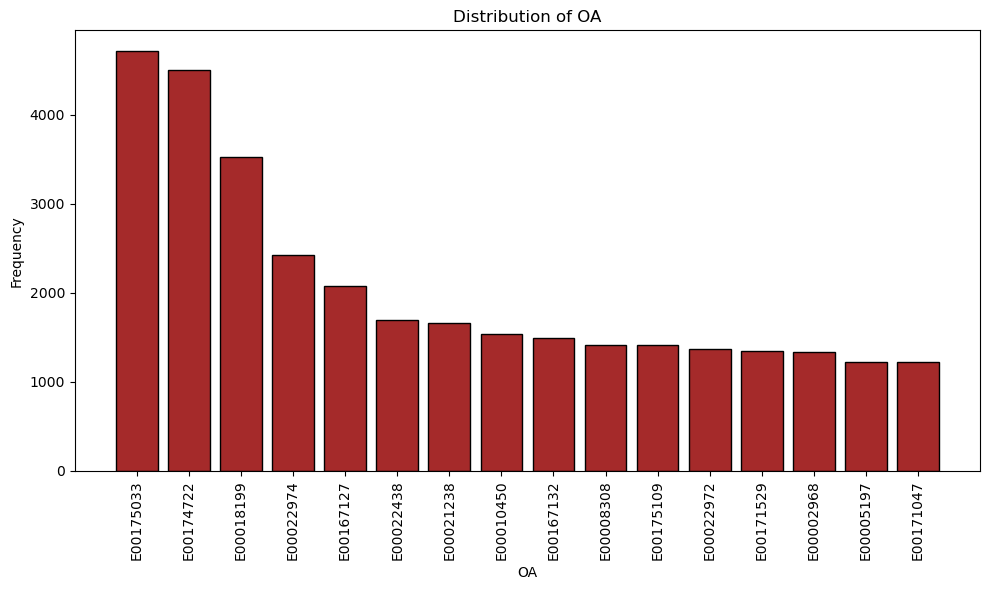

In [21]:
DOM_categorical(merged, thresholds=list_thresh, features='OA')

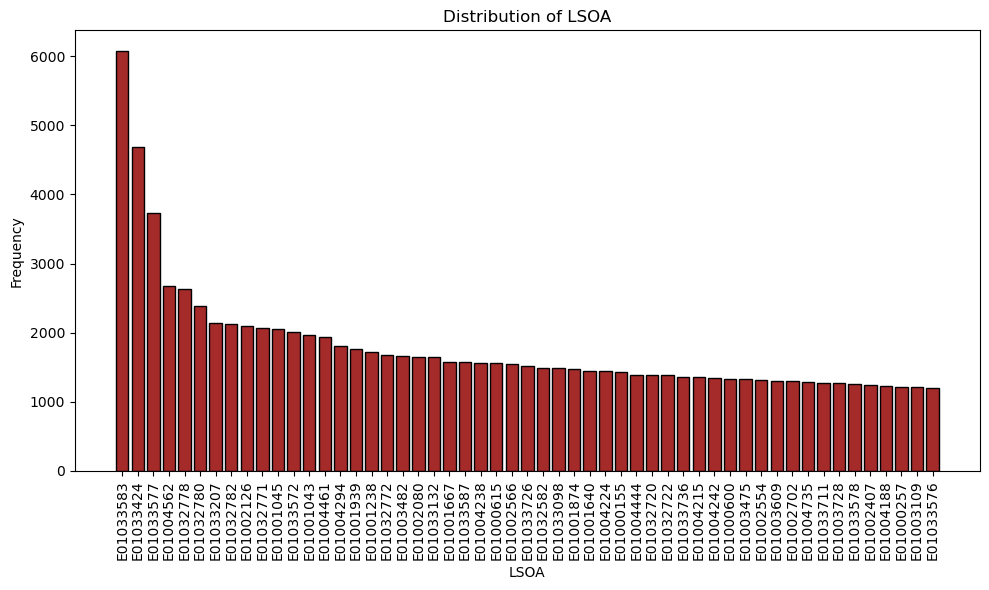

In [19]:
DOM_categorical(merged, thresholds=list_thresh,features='LSOA')

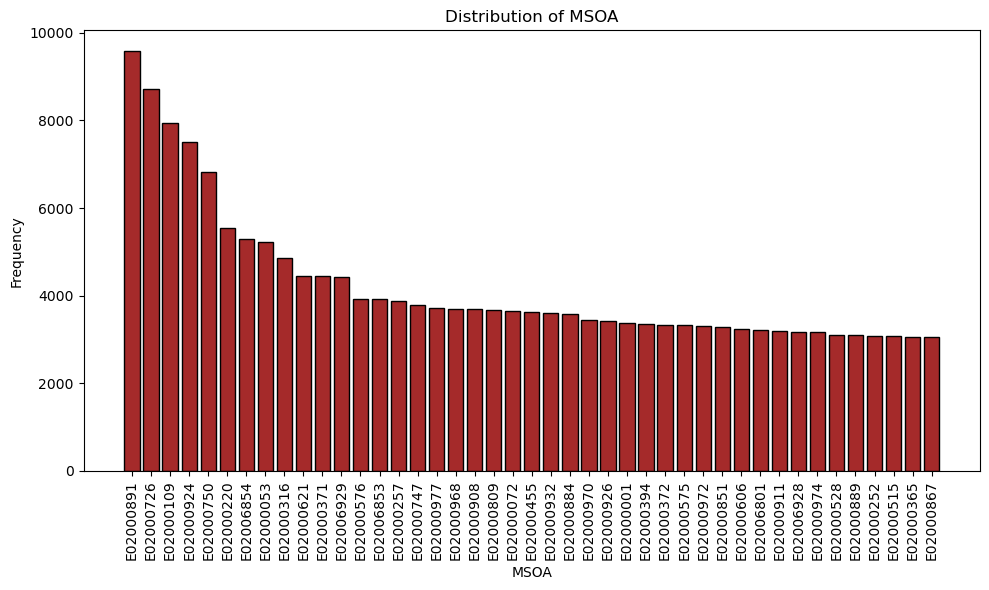

In [21]:
DOM_categorical(merged, thresholds=list_thresh, features='MSOA')

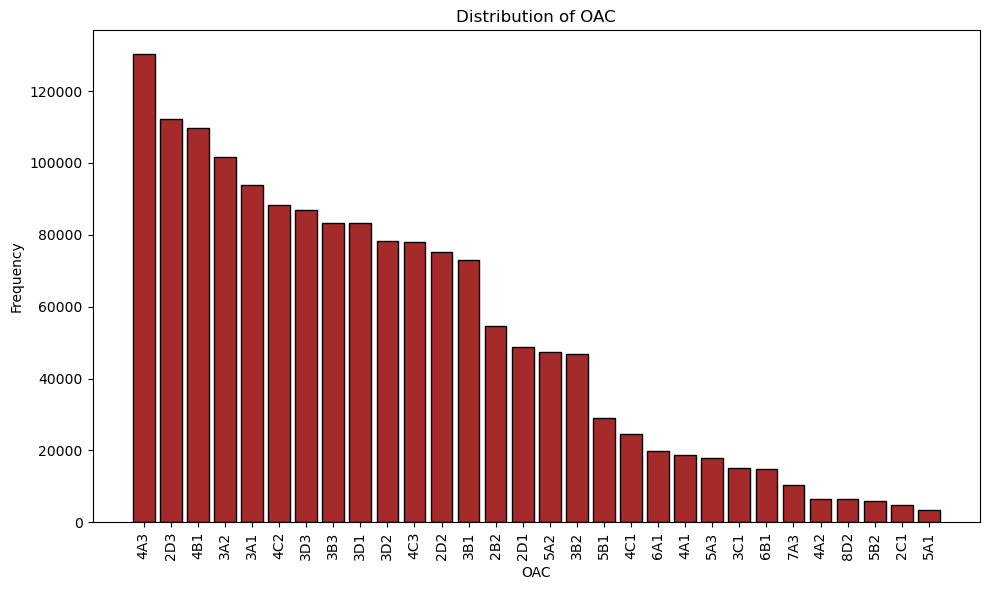

In [23]:
DOM_categorical(merged, thresholds=list_thresh,  features='OAC')

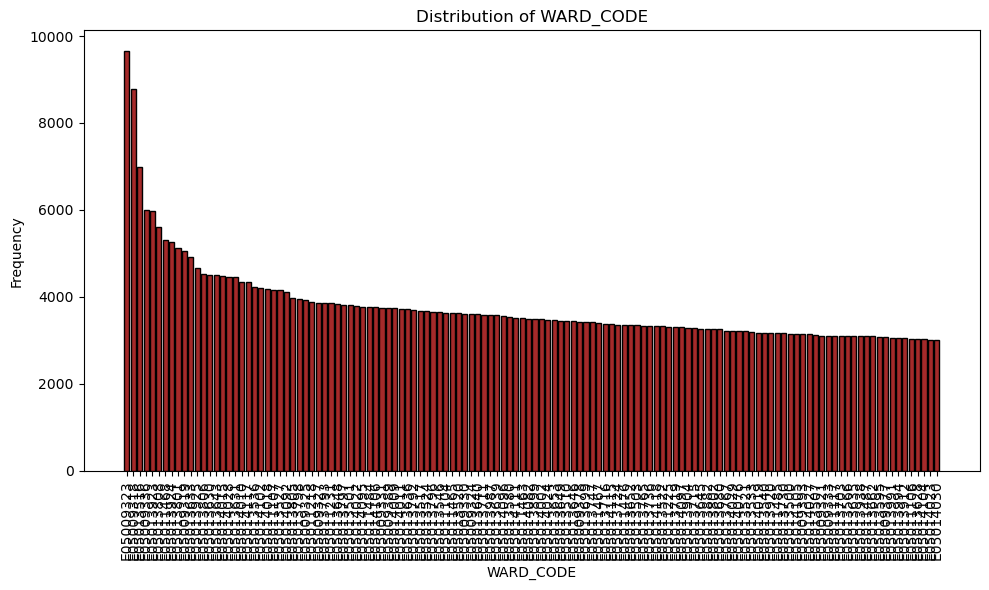

In [25]:
DOM_categorical(merged, thresholds=list_thresh, features='WARD_CODE')

In [19]:
print("Most frequent ward:", WARD)

Most frequent ward: Canary Wharf


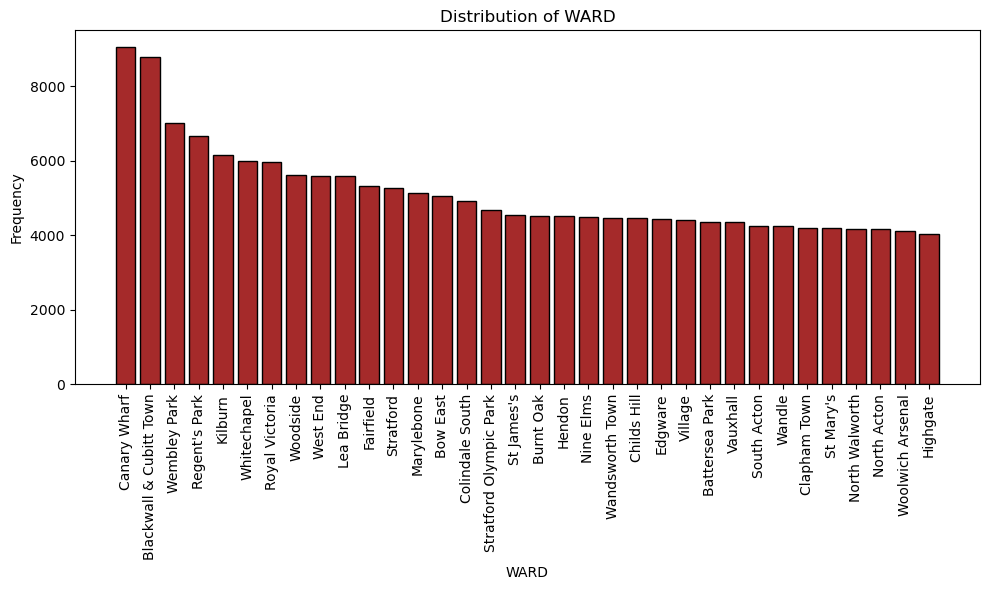

In [28]:
DOM_categorical(merged, thresholds=list_thresh,  features='WARD')

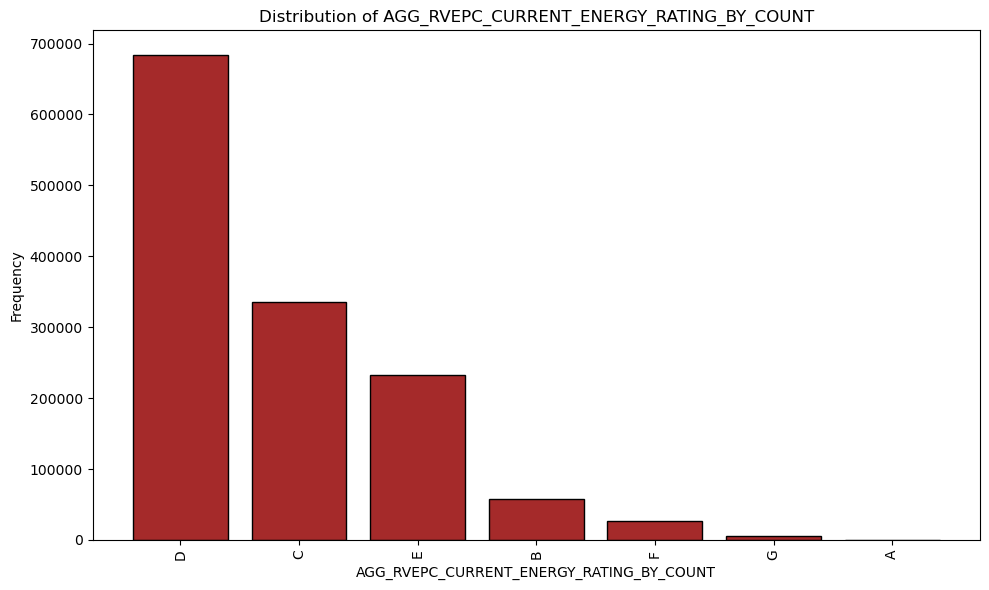

In [30]:
DOM_categorical(merged, thresholds=list_thresh, features='AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT')

In [31]:
merged['MIX_CLASS'].value_counts()#.idxmax()
#merged.loc[:, 'MIX_CLASS'] =merged['MIX_CLASS'].replace(np.nan, "10")

MIX_CLASS
10.0    496793
9.0     356756
8.0     285101
7.0     114440
4.0      28273
1.0      10655
5.0       8695
6.0       8326
2.0       4366
3.0       3680
Name: count, dtype: int64

In [19]:
merged = median(merged, 'MIX_CLASS')

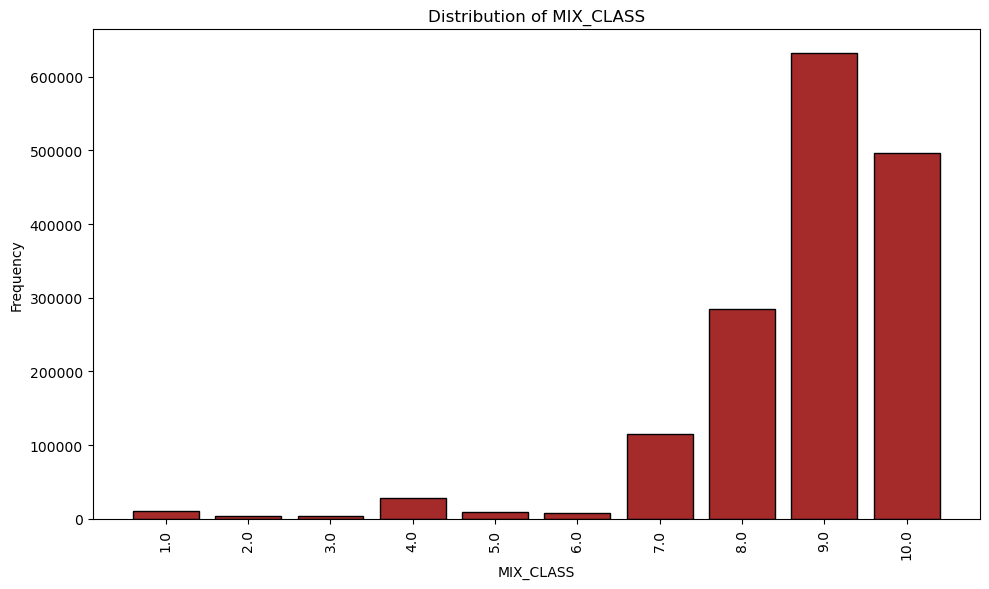

In [23]:
DOM_categorical(merged, thresholds=list_thresh, features='MIX_CLASS')

In [24]:
merged['COUNT_D_UPRNS'].value_counts()#.idxmax()

COUNT_D_UPRNS
1.0       518277
2.0       148983
3.0        64121
4.0        57207
6.0        48329
           ...  
1636.0         1
237.0          1
231.0          1
723.0          1
216.0          1
Name: count, Length: 294, dtype: int64

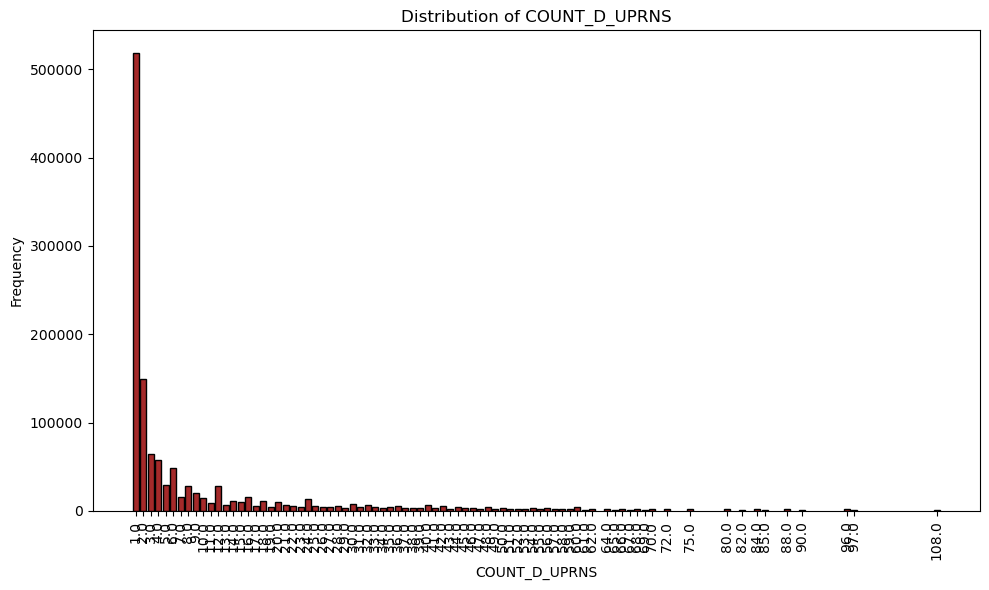

In [35]:
DOM_categorical(merged, thresholds=list_thresh, features='COUNT_D_UPRNS')

In [20]:
merged.loc[:, 'COUNT_D_UPRNS']=np.random.randint(1.0,200,len(merged))
max_nd=max(merged['COUNT_D_UPRNS'])
max_nd

199.0

<Axes: ylabel='COUNT_D_UPRNS_bin'>

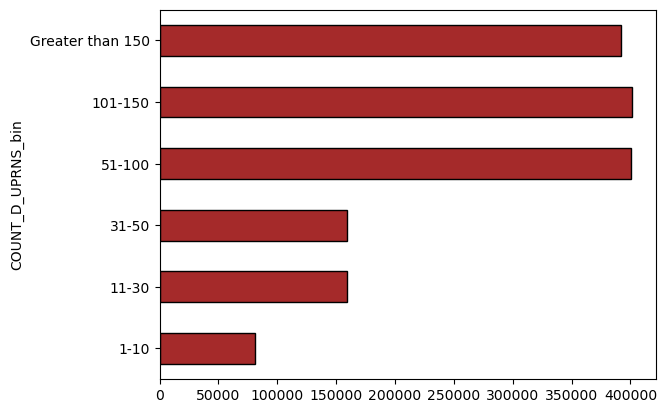

In [21]:
bins1 = [0, 10, 30, 50, 100, 150, max_nd ]  # Include max_nd in the last bin
category1 = ["1-10", "11-30", "31-50", "51-100", "101-150", "Greater than 150"]
merged.loc[:, 'COUNT_D_UPRNS_bin']=pd.cut(merged['COUNT_D_UPRNS'],bins=bins1,labels=category1)
#merged['COUNT_D_UPRNS_bin'].value_counts().plot(kind='barh')
merged['COUNT_D_UPRNS_bin'].value_counts().sort_index().plot(kind='barh', color='brown', edgecolor='black')

In [22]:
merged = median(merged, 'COUNT_D_UPRNS')

In [15]:
merged['SCU_ID'].value_counts()#.idxmax()

SCU_ID
5.360103e+13    672
5.900101e+13    665
5.390102e+13    439
5.150111e+13    439
5.990103e+13    406
               ... 
5.480114e+13      1
5.480104e+13      1
5.480107e+13      1
5.480102e+13      1
5.780107e+13      1
Name: count, Length: 707045, dtype: int64

In [23]:
merged.loc[:,'SCU_ID'].fillna(method='ffill', inplace=True)#USING FORWARD METHOD

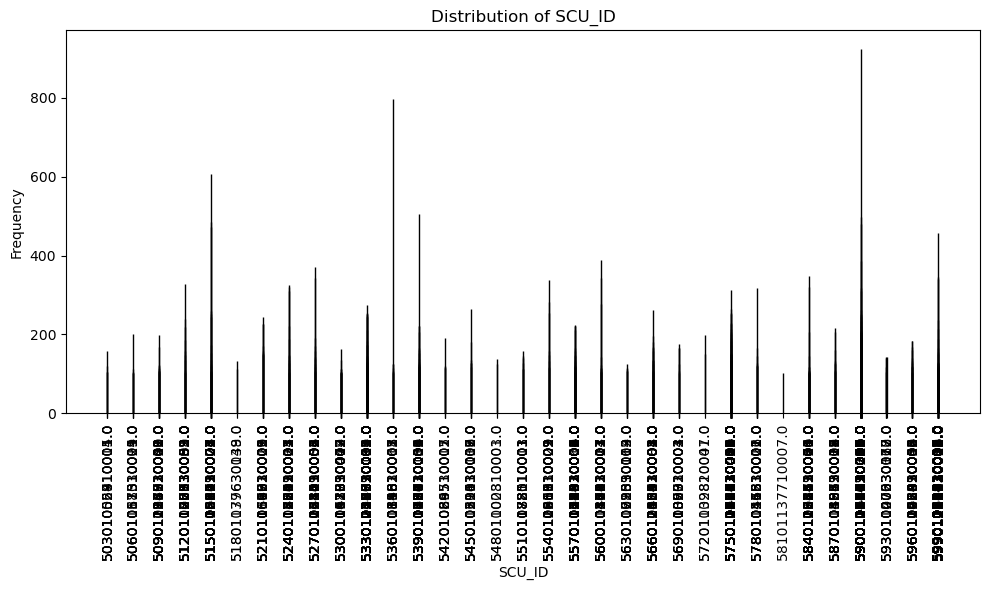

In [15]:
DOM_categorical(merged, thresholds=list_thresh, features='SCU_ID')

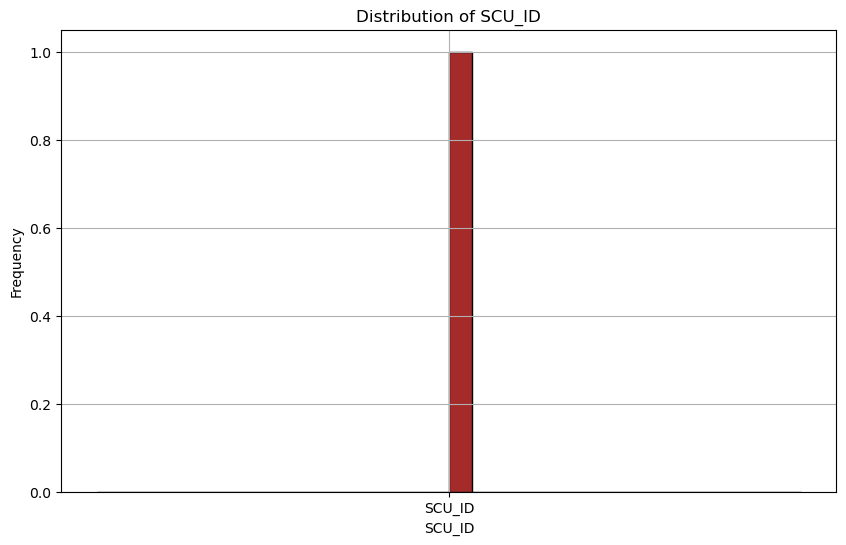

In [31]:
plt.figure(figsize=(10, 6))
plt.hist(['SCU_ID'], bins=30, color='brown',edgecolor='black')
plt.title('Distribution of SCU_ID')
plt.xlabel('SCU_ID')
plt.ylabel('Frequency')
#plt.xlim([0, 6])
plt.grid(True)
plt.show()

In [32]:
merged['ESTIMATED_FLOOR_COUNT'].value_counts()#.idxmax()
#merged['OA']= merged['OA'].replace(np.nan, "E00175033")

ESTIMATED_FLOOR_COUNT
2.0      644935
3.0      253684
4.0      132001
5.0       76881
1.0       74109
6.0       49817
7.0       29082
8.0       21095
9.0       12130
10.0      10773
11.0       7210
12.0       7001
13.0       3308
14.0       3156
15.0       2814
17.0       2197
16.0       2173
20.0       2156
18.0       2126
22.0       1369
21.0       1345
19.0       1221
23.0        514
0.0         471
24.0        395
43.0        315
33.0        220
26.0        173
27.0         88
25.0         62
34.0         37
42.0         19
31.0          2
100.0         1
39.0          1
66.0          1
Name: count, dtype: int64

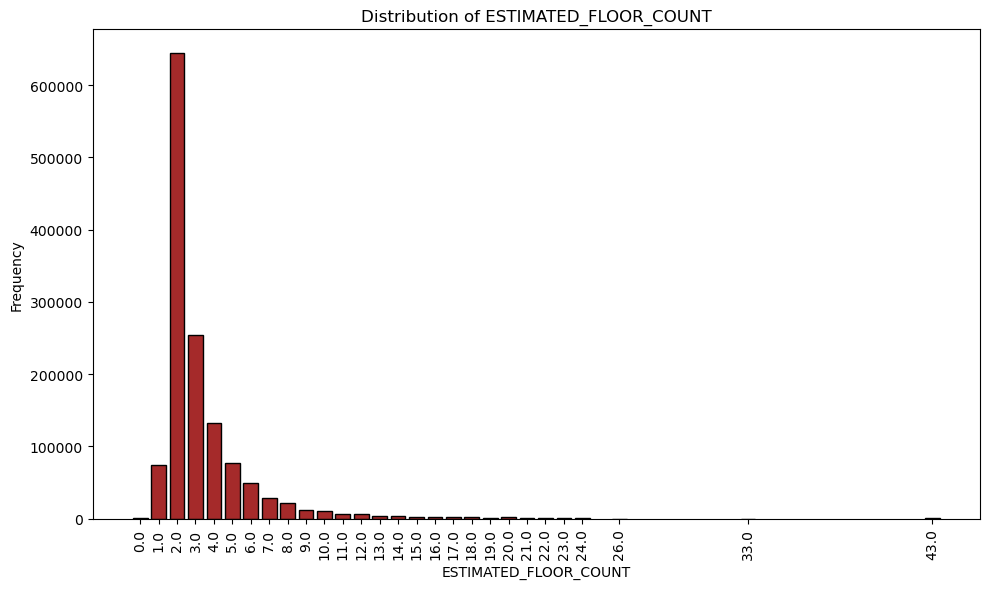

In [33]:
DOM_categorical(merged, thresholds=list_thresh, features='ESTIMATED_FLOOR_COUNT')

In [24]:
merged.loc[:,'ESTIMATED_FLOOR_COUNT']=np.random.randint(1.0,100,len(merged))
max_EFC=max(merged['ESTIMATED_FLOOR_COUNT'])
max_EFC

99.0

<Axes: ylabel='ESTIMATED_FLOOR_COUNT_bin'>

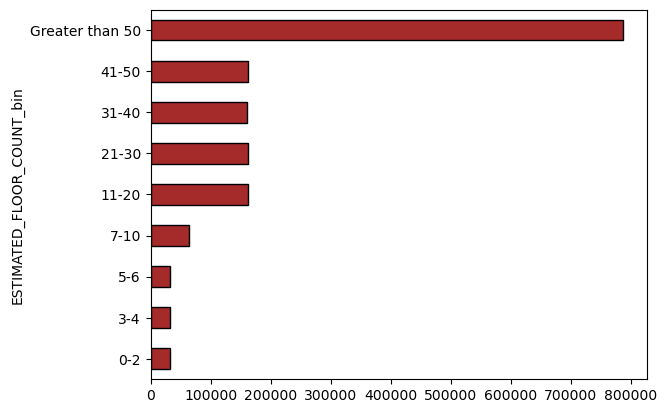

In [25]:
bin1=[0, 2, 4, 6, 10, 20, 30, 40, 50,max_EFC]
category1=['0-2', '3-4', '5-6', '7-10', '11-20', '21-30', '31-40', '41-50','Greater than 50']
merged.loc[:,'ESTIMATED_FLOOR_COUNT_bin']=pd.cut(merged['ESTIMATED_FLOOR_COUNT'],bins=bin1,labels=category1)
merged['ESTIMATED_FLOOR_COUNT_bin'].value_counts().sort_index().plot(kind='barh', color='brown', edgecolor='black')

In [26]:
merged = median(merged, 'ESTIMATED_FLOOR_COUNT')

### 2.2 Continous Data Analysis [^](#index) <a name="2.2"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
    Below is the list for the continuous data:
    <br><br>
    1. ESTIMATE_TOTAL_FLOOR_AREA_ALL <br>
    2. MEAN_OBJECT_HEIGHT <br>
    3. AGG-RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT
</div>



In [27]:
def plot_continous(df, feature, x_rotation=90, x_fontsize=10, edge_color='black', 
                   figsize=(10, 6),colour='brown', x_limits=None,bins=30):
    """
    Plots the distribution for continous data.
    
    Parameters:
    - df :Dataframe from EPC
    - feature: Referring to the columns from EPC
    -x_rotation: 90 degree to display label axis at x-axis
    -x_fontsize: The size of the font for lables at x-axis
    -edge colour:Outline colour for the bar graph
    -figsize: The dimension of the plot, width and height
    -colour: Colour of the bar graph
    -x_limit: Scaling for x_axis
    -bins: Number of intervals in the bar plot
      
    """
    
    freq = (df[feature].value_counts())# Count the frequency of each features
    
    plt.figure(figsize=figsize)
    plt.hist(df[feature], bins=bins, color=colour, edgecolor=edge_color)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    
    if x_limits is not None:
        plt.xlim(x_limits)
        
    plt.xticks(rotation=x_rotation, fontsize=x_fontsize)
    plt.grid(False)
    plt.tight_layout()
    plt.show()
    

In [28]:
def average_mean(df, feature):
    """
    Calculate mean value to replace NAN values.
    
    Parameters:
    - df :Dataframe from EPC
    - feature: Referring to the column from EPC
    """
    
    df[feature] = df[feature].astype(float)
    
    df = df.reset_index(drop=True)
    
    # Loop through the rows of the dataframe
    for i in range(len(df)):
        if pd.isna(df.iloc[i][feature]):
            
            # Determine the previous and the next value at the NaN cell
            previous = df.iloc[i-1][feature] if i > 0 else np.nan
            next_val = df.iloc[i+1][feature] if i < len(df)-1 else np.nan
            
            # Calculate the mean of the previous and next values
            if pd.notna(previous) and pd.notna(next_val):
                mean = (previous + next_val) / 2
            elif pd.notna(previous):
                mean = previous
            elif pd.notna(next_val):
                mean = next_val
            else:
                mean = np.nan
            
            # Replace the NaN cell with the mean value
            df.at[i, feature] = mean
            
    return df


In [21]:
merged['ESTIMATE_TOTAL_FLOOR_AREA_ALL']#continous

0           124.00
1          1960.61
2           106.00
3          9818.00
4          1436.00
            ...   
1593324      79.00
1593325      93.00
1593326     262.55
1593327      34.32
1593328     848.00
Name: ESTIMATE_TOTAL_FLOOR_AREA_ALL, Length: 1593329, dtype: float64

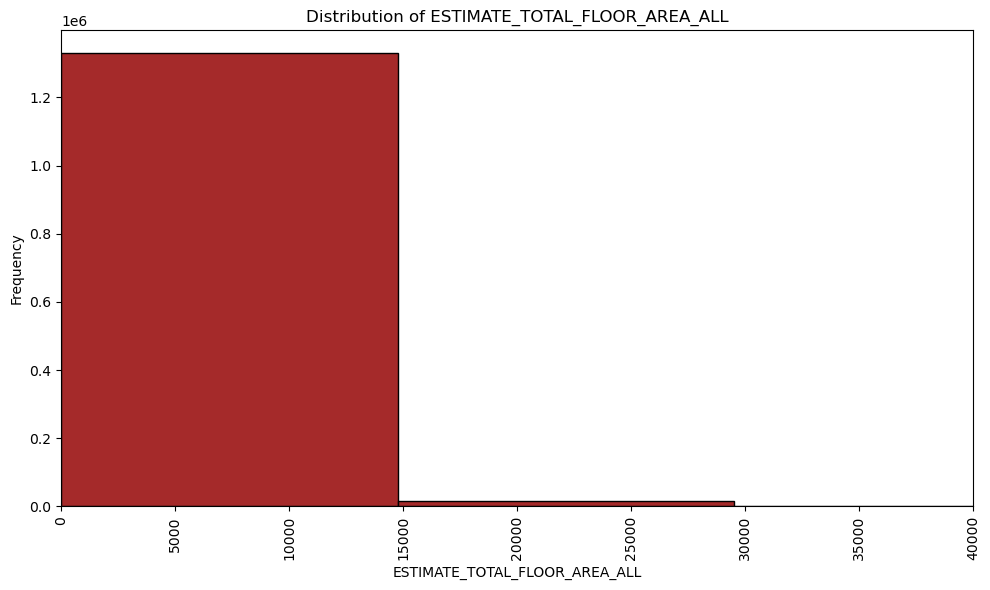

In [40]:
plot_continous(merged, 'ESTIMATE_TOTAL_FLOOR_AREA_ALL', x_rotation=90, x_fontsize=10, x_limits=(0, 40000))

In [29]:
merged= average_mean(merged, 'ESTIMATE_TOTAL_FLOOR_AREA_ALL')

In [42]:
merged['MEAN_OBJECT_HEIGHT_M'].value_counts()

MEAN_OBJECT_HEIGHT_M
6.60      3328
6.50      3278
6.30      3251
6.40      3209
6.20      3165
          ... 
24.41        1
1.57         1
31.05        1
43.20        1
163.13       1
Name: count, Length: 3493, dtype: int64

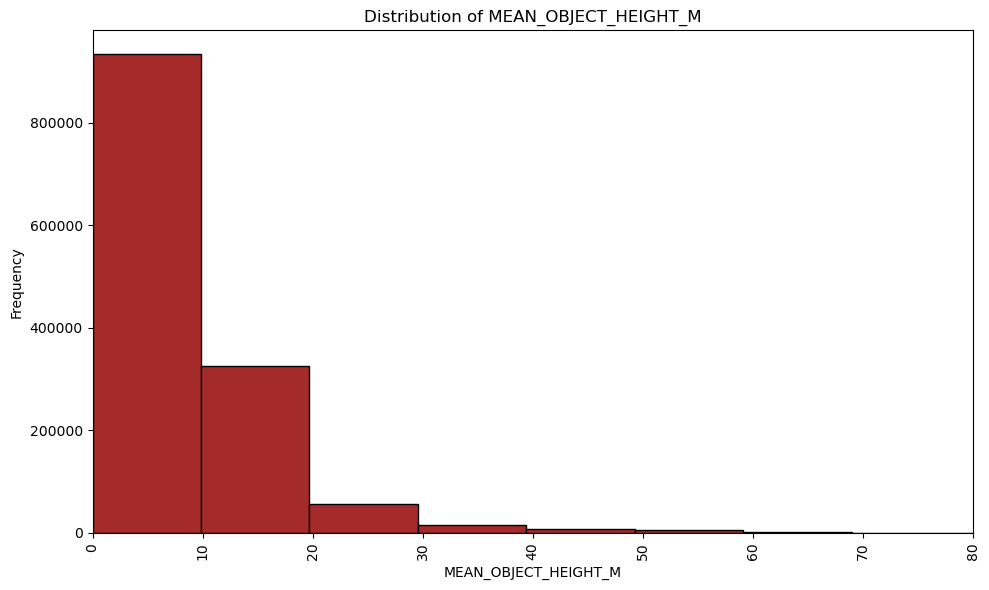

In [43]:
plot_continous(merged, 'MEAN_OBJECT_HEIGHT_M', x_rotation=90, x_fontsize=10, x_limits=(0, 80))

In [30]:
merged= average_mean(merged, 'MEAN_OBJECT_HEIGHT_M')

In [33]:
merged['AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT'].value_counts()#.idxmax()
#merged['OA']= merged['OA'].replace(np.nan, "E00175033")

AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT
 62.0     54183
 64.0     52126
 60.0     50823
 66.0     50549
 68.0     47151
          ...  
-67.0         1
-39.0         1
-118.0        1
-74.0         1
-249.0        1
Name: count, Length: 178, dtype: int64

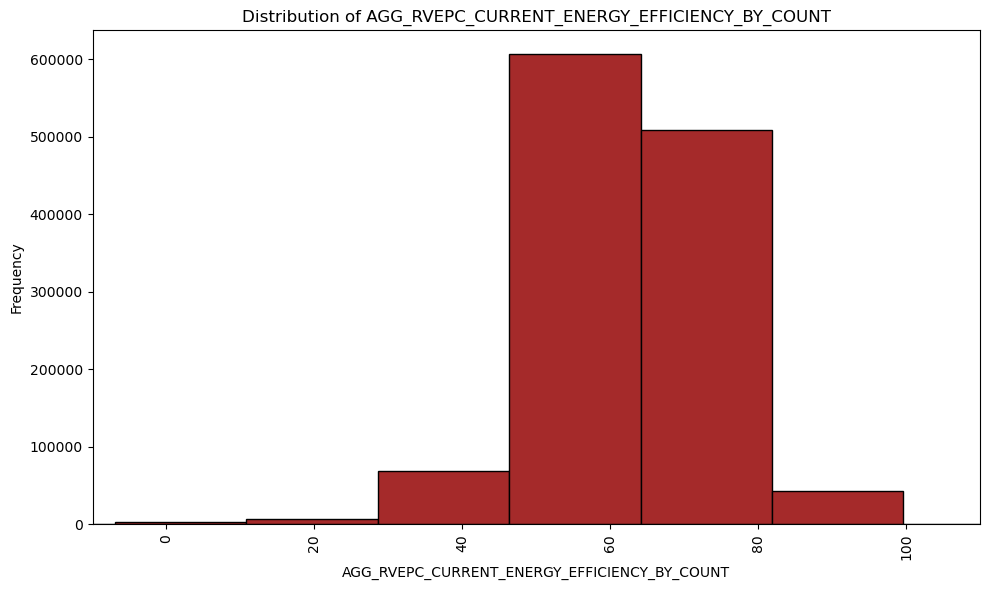

In [34]:
plot_continous(merged, 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT', x_rotation=90, x_fontsize=10, x_limits=(-10, 110))

In [31]:
merged= average_mean(merged, 'AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT')

In [84]:
merged['SCU_FOOTPRINT'].value_counts()#.idxmax

SCU_FOOTPRINT
3039.600    796
863.040     717
1010.260    520
2004.870    472
2883.270    446
           ... 
228.655       1
766.740       1
279.675       1
347.425       1
517.775       1
Name: count, Length: 127589, dtype: int64

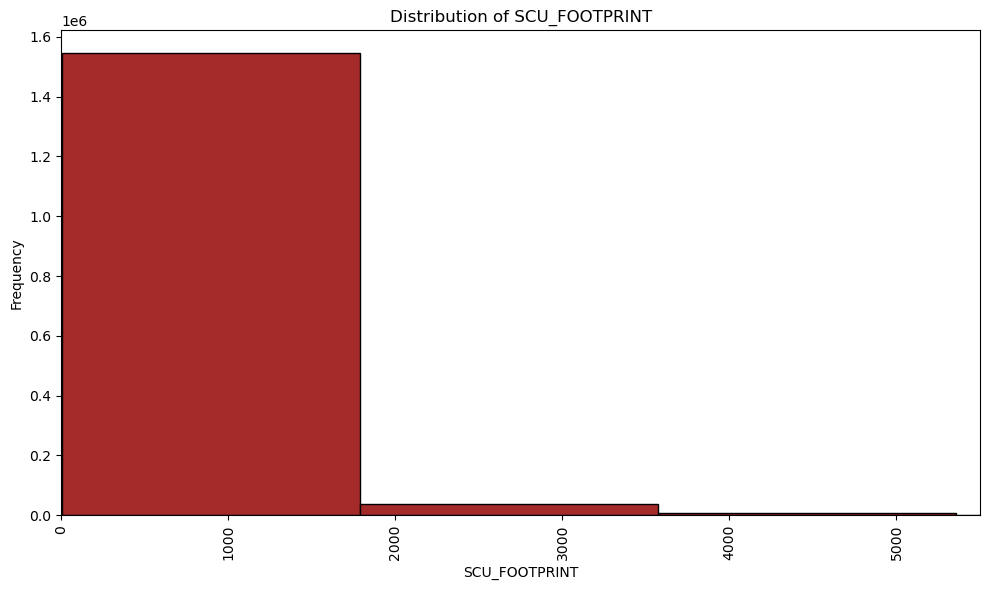

In [85]:
plot_continous(merged, 'SCU_FOOTPRINT', x_rotation=90, x_fontsize=10, x_limits=(0, 5500))

In [32]:
merged= average_mean(merged, 'SCU_FOOTPRINT')

In [33]:
NAN = merged.isnull().sum()
NAN1 = NAN[NAN > 0]
NAN1

OA                                             602
LSOA                                           602
MSOA                                           602
OAC                                            602
WARD_CODE                                      602
WARD                                           602
AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT    251022
dtype: int64

In [34]:
merge= merged.dropna()

In [35]:
#Checking for NAN for more than 10 columns
Nan=merge.isnull()

for column in Nan.columns.values.tolist():
    print(column)
    print (Nan[column].value_counts())
    print("") 

LMK_KEY
LMK_KEY
False    1342168
Name: count, dtype: int64

ADDRESS1
ADDRESS1
False    1342168
Name: count, dtype: int64

BUILDING_REFERENCE_NUMBER
BUILDING_REFERENCE_NUMBER
False    1342168
Name: count, dtype: int64

POSTCODE
POSTCODE
False    1342168
Name: count, dtype: int64

TENURE
TENURE
False    1342168
Name: count, dtype: int64

UPRN
UPRN
False    1342168
Name: count, dtype: int64

UPRN_SOURCE
UPRN_SOURCE
False    1342168
Name: count, dtype: int64

PROPERTY_TYPE
PROPERTY_TYPE
False    1342168
Name: count, dtype: int64

BUILT_FORM
BUILT_FORM
False    1342168
Name: count, dtype: int64

year
year
False    1342168
Name: count, dtype: int64

INSPECTION_DATE
INSPECTION_DATE
False    1342168
Name: count, dtype: int64

CO2_EMISSIONS_CURRENT
CO2_EMISSIONS_CURRENT
False    1342168
Name: count, dtype: int64

CURRENT_ENERGY_RATING
CURRENT_ENERGY_RATING
False    1342168
Name: count, dtype: int64

CURRENT_ENERGY_EFFICIENCY
CURRENT_ENERGY_EFFICIENCY
False    1342168
Name: count, dtype: int64



In [36]:
merge

,LMK_KEY,ADDRESS1,BUILDING_REFERENCE_NUMBER,POSTCODE,TENURE,UPRN,UPRN_SOURCE,PROPERTY_TYPE,BUILT_FORM,year,...,SCU_FOOTPRINT,MEAN_OBJECT_HEIGHT_M,COUNT_D_UPRNS,MIX_CLASS,DEC_COUNT,EPC_RATING_COUNT_DOM,AGG_RVEPC_CURRENT_ENERGY_EFFICIENCY_BY_COUNT,AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT,COUNT_D_UPRNS_bin,ESTIMATED_FLOOR_COUNT_bin
0,20e1bbd4c3e619b7d333af256de02e44169ee228a297f5...,209a Green Street,10003607682,E7 8LL,Rented (private),1.000899e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,73.50,5.90,108.0,9.0,0,0,81.0,B,101-150,Greater than 50
1,188af6dacb4137e02fd8964966ec981f4c3f5c4ea6b700...,Flat 97,10003516387,E15 2GB,Rented (private),1.009033e+10,Energy Assessor,Flat,Semi-Detached,2022.0,...,696.08,13.82,193.0,7.0,0,22,79.0,C,Greater than 150,Greater than 50
2,189637da5cc47f86d824c37663194e1f2a28e3ee5654b1...,34 Mitcham Road,10003448733,E6 3LU,Rented (private),4.605080e+07,Energy Assessor,House,End-Terrace,2022.0,...,76.59,5.18,127.0,10.0,0,1,44.0,E,101-150,Greater than 50
3,1897b2921445e4861204269cd4cd66bf7aabb8c3a79b52...,Flat 35,10003510192,E15 3LE,Rented (social),4.604471e+07,Energy Assessor,Flat,End-Terrace,2022.0,...,487.72,56.61,38.0,8.0,0,34,67.0,D,31-50,41-50
4,189c0e87dc613023b1a9e42416645b96333e2893ae2371...,Flat 42,10003511750,E16 4LX,Owner-occupied,1.000901e+10,Energy Assessor,Flat,Mid-Terrace,2022.0,...,500.75,8.88,59.0,8.0,0,13,65.0,D,51-100,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593324,01115f38b4b3c063d210222231dbaec008b88e0557cb86...,199 Buckhurst Way,10002685845,IG9 6JB,Owner-occupied,1.000222e+11,Energy Assessor,House,End-Terrace,2022.0,...,37.98,7.25,79.0,10.0,0,0,58.0,D,51-100,41-50
1593325,00fede183e28ba0b6e3868de003f227fdfa0a7b616c0ba...,251 Maybank Road,10002733331,E18 1ER,Owner-occupied,1.000223e+11,Energy Assessor,House,Semi-Detached,2022.0,...,51.75,6.12,165.0,10.0,0,1,45.0,E,Greater than 150,21-30
1593326,00cad7ab89e5159a0864b4de6e2faad8e2c07307ad9c3b...,29c Grosvenor Road,10002617564,E11 2EW,Owner-occupied,1.003491e+10,Energy Assessor,Flat,End-Terrace,2022.0,...,71.55,10.82,31.0,9.0,0,5,63.0,D,31-50,3-4
1593327,006da7fc42ee9e7c3c8d023ad6eadda2a506fc1e811a1c...,18 Palmer Road,10002625957,RM8 1TD,Owner-occupied,1.000222e+11,Energy Assessor,House,Mid-Terrace,2022.0,...,34.33,4.60,120.0,10.0,0,1,73.0,C,101-150,11-20


In [32]:
merge.columns

Index(['ENERGY_CONSUMPTION_CURRENT', 'LMK_KEY', 'ADDRESS1',
       'BUILDING_REFERENCE_NUMBER', 'POSTCODE', 'TENURE', 'UPRN',
       'UPRN_SOURCE', 'PROPERTY_TYPE', 'BUILT_FORM', 'year', 'INSPECTION_DATE',
       'CO2_EMISSIONS_CURRENT', 'CURRENT_ENERGY_RATING',
       'CURRENT_ENERGY_EFFICIENCY', 'CO2_EMISS_CURR_PER_FLOOR_AREA',
       'TOTAL_FLOOR_AREA', 'ENERGY_TARIFF', 'MAINS_GAS_FLAG',
       'MULTI_GLAZE_PROPORTION', 'TRANSACTION_TYPE', 'GLAZED_AREA',
       'EXTENSION_COUNT', 'NUMBER_HABITABLE_ROOMS', 'NUMBER_HEATED_ROOMS',
       'FLOOR_DESCRIPTION', 'WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF',
       'WINDOWS_ENV_EFF', 'WALLS_DESCRIPTION', 'WALLS_ENERGY_EFF',
       'WALLS_ENV_EFF', 'ROOF_DESCRIPTION', 'MAIN_FUEL',
       'CONSTRUCTION_AGE_BAND', 'ENVIRONMENT_IMPACT_CURRENT',
       'SOLAR_WATER_HEATING_FLAG', 'MECHANICAL_VENTILATION',
       'LIGHTING_ENV_EFF', 'LIGHTING_ENERGY_EFF', 'LIGHTING_DESCRIPTION',
       'MAINHEATC_ENV_EFF', 'MAINHEAT_ENERGY_EFF', 'MAINHEAT_DESCRIPT

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;At this point, all data have been cleaned, and unnecessary features have dropped.
The next cell is to save some features in categorical type for further analysis after estimated energy consumption.<div>

In [26]:
fi = [
  'ADMINISTRATIVE_AREA','UPRN','INSPECTION_DATE','LATITUDE',
       'LONGITUDE','MAIN_FUEL','MAINS_GAS_FLAG','CO2_EMISS_CURR_PER_FLOOR_AREA',
    'CO2_EMISSIONS_CURRENT','ENERGY_CONSUMPTION_CURRENT'
]

dom_df = merge[fi]
dom_df 

,ADMINISTRATIVE_AREA,UPRN,INSPECTION_DATE,LATITUDE,LONGITUDE,MAIN_FUEL,MAINS_GAS_FLAG,CO2_EMISS_CURR_PER_FLOOR_AREA,CO2_EMISSIONS_CURRENT,ENERGY_CONSUMPTION_CURRENT
0,NEWHAM,1.000899e+10,2022-11-17,51.541748,0.032908,mains gas (not community),Y,43,2.1,242
1,NEWHAM,1.009033e+10,2022-10-01,51.535298,-0.006210,mains gas (community),N,18,2.0,101
2,NEWHAM,4.605080e+07,2022-10-05,51.527027,0.054569,mains gas (not community),Y,40,4.0,225
3,NEWHAM,4.604471e+07,2022-09-16,51.534493,0.007251,mains gas (not community),Y,30,1.7,168
4,NEWHAM,1.000901e+10,2022-10-06,51.518023,0.007997,mains gas (not community),Y,37,1.5,209
...,...,...,...,...,...,...,...,...,...,...
1593324,REDBRIDGE,1.000222e+11,2022-05-18,51.616281,0.045250,mains gas (not community),Y,43,3.1,244
1593325,REDBRIDGE,1.000223e+11,2022-04-08,51.596987,0.038232,mains gas (not community),Y,51,4.0,289
1593326,REDBRIDGE,1.003491e+10,2022-04-21,51.580078,0.028599,mains gas (not community),Y,46,2.2,258
1593327,REDBRIDGE,1.000222e+11,2022-04-20,51.567304,0.128792,mains gas (not community),Y,25,1.5,144


In [27]:
dom_df .to_csv('2.1 DOM_1723_AA_UPRN_LAT_LONG_mainfuel_NAN category.csv', index=False)


# 3. Convert categorical to numerical [^](#index) <a name="3"></a> 

In [37]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342168 entries, 0 to 1593328
Data columns (total 76 columns):
 #   Column                                        Non-Null Count    Dtype   
---  ------                                        --------------    -----   
 0   LMK_KEY                                       1342168 non-null  object  
 1   ADDRESS1                                      1342168 non-null  object  
 2   BUILDING_REFERENCE_NUMBER                     1342168 non-null  int64   
 3   POSTCODE                                      1342168 non-null  object  
 4   TENURE                                        1342168 non-null  object  
 5   UPRN                                          1342168 non-null  float64 
 6   UPRN_SOURCE                                   1342168 non-null  object  
 7   PROPERTY_TYPE                                 1342168 non-null  object  
 8   BUILT_FORM                                    1342168 non-null  object  
 9   year                         

In [38]:
drop_bin=[
        
    'COUNT_D_UPRNS_bin','ESTIMATED_FLOOR_COUNT_bin'
     ]

merge.drop(columns=drop_bin,axis=1,inplace=True)

/tmp/ipykernel_6464/1103274628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge.drop(columns=drop_bin,axis=1,inplace=True)


In [89]:
merged['LSOA'].value_counts

<bound method IndexOpsMixin.value_counts of 0          3485
1          4770
2          3450
3          3551
4          3429
           ... 
1592722    3578
1592723    3675
1592724    3692
1592725    4666
1592726    3643
Name: LSOA, Length: 1592727, dtype: object>

In [39]:
merge.loc[:,'EXTENSION_COUNT'] = merge['EXTENSION_COUNT'].astype(str)
merge.loc[:,'NUMBER_HABITABLE_ROOMS']=merge['NUMBER_HABITABLE_ROOMS'].astype(str)
merge.loc[:,'NUMBER_HEATED_ROOMS']=merge['NUMBER_HEATED_ROOMS'].astype(str)
merge.loc[:,'EPC_RATING_COUNT_DOM']=merge['EPC_RATING_COUNT_DOM'].astype(str)
merge.loc[:,'ENVIRONMENT_IMPACT_CURRENT']=merge['ENVIRONMENT_IMPACT_CURRENT'].astype(str)
merge.loc[:,'COUNT_D_UPRNS']=merge['COUNT_D_UPRNS'].astype(str)
merge.loc[:,'MIX_CLASS']=merge['MIX_CLASS'].astype(str)

merge.loc[:,'BUILDING_REFERENCE_NUMBER']=merge['BUILDING_REFERENCE_NUMBER'].astype(str)
merge.loc[:,'ESTIMATED_FLOOR_COUNT']=merge['ESTIMATED_FLOOR_COUNT'].astype(str)
merge.loc[:,'DEC_COUNT']=merge['DEC_COUNT'].astype(str)

In [40]:


from sklearn.preprocessing import LabelEncoder


col = [
    'LMK_KEY','ADDRESS1','POSTCODE','TENURE','UPRN_SOURCE','PROPERTY_TYPE','BUILT_FORM',                                     
     'FLOOR_DESCRIPTION','WINDOWS_DESCRIPTION', 'WINDOWS_ENERGY_EFF','WINDOWS_ENV_EFF',                                
    'WALLS_DESCRIPTION','WALLS_ENERGY_EFF','WALLS_ENV_EFF','ROOF_DESCRIPTION',
    'MAIN_FUEL','CONSTRUCTION_AGE_BAND','SOLAR_WATER_HEATING_FLAG','MECHANICAL_VENTILATION',                          
    'LIGHTING_ENV_EFF','LIGHTING_ENERGY_EFF','LIGHTING_DESCRIPTION','MAINHEAT_ENERGY_EFF',                           
    'MAINHEAT_DESCRIPTION','MAINHEAT_ENV_EFF','HOTWATER_DESCRIPTION','HOT_WATER_ENERGY_EFF',                          
    'HOT_WATER_ENV_EFF','OS_TOPO_TOID','OA','LSOA','MSOA','OAC','WARD_CODE','WARD',                                            
    'ADMINISTRATIVE_AREA','AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT','ENERGY_TARIFF',                               
    'MAINS_GAS_FLAG','TRANSACTION_TYPE','GLAZED_AREA','CURRENT_ENERGY_RATING'      
]


le = LabelEncoder()

# Loop through specified columns and apply LabelEncoder
for column in col:
    if column in merge.columns and merge[column].dtype == 'object':
        merge.loc[:,column] = merge[column].str.lower().str.strip()  # Clean the string values
        merge.loc[:,column] = le.fit_transform(merge[column])
        
        # Create a dictionary to map original string values to numerical values
        le_map = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"Mapping for {column}: {le_map}")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Mapping for TENURE: {'not defined - use in the case of a new dwelling for which the intended tenure in not known. it is not to be used for an existing dwelling': 0, 'owner-occupied': 1, 'rental (private)': 2, 'rental (social)': 3, 'rented (private)': 4, 'rented (social)': 5, 'unknown': 6}
Mapping for UPRN_SOURCE: {'address matched': 0, 'energy assessor': 1}
Mapping for PROPERTY_TYPE: {'bungalow': 0, 'flat': 1, 'house': 2, 'maisonette': 3, 'park home': 4}
Mapping for BUILT_FORM: {'detached': 0, 'enclosed end-terrace': 1, 'enclosed mid-terrace': 2, 'end-terrace': 3, 'mid-terrace': 4, 'no data!': 5, 'semi-detached': 6}
Mapping for FLOOR_DESCRIPTION: {'(anheddiad arall islaw)': 0, '(another dwelling below)': 1, '(other premises below)': 2, 'average thermal transmittance 0 w/m-¦k': 3, 'average thermal transmittance 0.01 w/m-¦k': 4, 'average thermal transmittance 0.02 w/m+é-¦k': 5, 'average thermal transmittance 0.02 w/m-¦k': 6, 'average thermal transmittance 0.03 w/m-¦k': 7, 'average therma

Mapping for WINDOWS_DESCRIPTION: {'full secondary glazing': 0, 'fully double glazed': 1, 'fully triple glazed': 2, 'gwydrau dwbl llawn': 3, 'high performance glazing': 4, 'mostly double glazing': 5, 'mostly multiple glazing': 6, 'mostly secondary glazing': 7, 'mostly triple glazing': 8, 'multiple glazing throughout': 9, 'partial double glazing': 10, 'partial multiple glazing': 11, 'partial secondary glazing': 12, 'partial triple glazing': 13, 'single glazed': 14, 'some double glazing': 15, 'some multiple glazing': 16, 'some secondary glazing': 17, 'some triple glazing': 18}
Mapping for WINDOWS_ENERGY_EFF: {'average': 0, 'good': 1, 'poor': 2, 'very good': 3, 'very poor': 4}
Mapping for WINDOWS_ENV_EFF: {'average': 0, 'good': 1, 'poor': 2, 'very good': 3, 'very poor': 4}
Mapping for WALLS_DESCRIPTION: {'average thermal transmittance -0.04 w/m-¦k': 0, 'average thermal transmittance -0.67 w/m-¦k': 1, 'average thermal transmittance -4.67 w/m-¦k': 2, 'average thermal transmittance 0 w/m-¦k':

Mapping for WALLS_ENERGY_EFF: {'average': 0, 'good': 1, 'poor': 2, 'very good': 3, 'very poor': 4}
Mapping for WALLS_ENV_EFF: {'average': 0, 'good': 1, 'poor': 2, 'very good': 3, 'very poor': 4}
Mapping for ROOF_DESCRIPTION: {'(annedd arall uwchben)': 0, '(another dwelling above)': 1, '(other premises above)': 2, 'ar oleddf, 100 mm o inswleiddio yn y llofft': 3, 'ar oleddf, 150 mm o inswleiddio yn y llofft': 4, 'ar oleddf, 200 mm o inswleiddio yn y llofft': 5, 'ar oleddf, 250 mm o inswleiddio yn y llofft': 6, 'ar oleddf, 300 mm o inswleiddio yn y llofft': 7, 'ar oleddf, dim inswleiddio (rhagdybiaeth)': 8, 'average thermal transmittance 0 w/m-¦k': 9, 'average thermal transmittance 0.01 w/m-¦k': 10, 'average thermal transmittance 0.02 w/m-¦k': 11, 'average thermal transmittance 0.03 w/m-¦k': 12, 'average thermal transmittance 0.05 w/m-¦k': 13, 'average thermal transmittance 0.06 w/m-¦k': 14, 'average thermal transmittance 0.07 w/m-¦k': 15, 'average thermal transmittance 0.08 w/m+é-¦k': 1

Mapping for MAIN_FUEL: {'anthracite': 0, 'b30d (community)': 1, 'b30k (not community)': 2, 'biogas (community)': 3, 'biogas (not community)': 4, 'biomass (community)': 5, 'bottled lpg': 6, 'bulk wood pellets': 7, 'coal (community)': 8, 'dual fuel - mineral + wood': 9, 'electricity (community)': 10, 'electricity (not community)': 11, 'electricity: electricity, unspecified tariff': 12, 'from heat network data (community)': 13, 'gas: bulk lpg': 14, 'gas: mains gas': 15, 'heat from boilers that can use mineral oil or biodiesel (community)': 16, 'heat from boilers using biodiesel from any biomass source (community)': 17, 'house coal (not community)': 18, 'invalid!': 19, 'lpg (community)': 20, 'lpg (not community)': 21, 'lpg - this is for backwards compatibility only and should not be used': 22, 'lpg special condition': 23, 'mains gas (community)': 24, 'mains gas (not community)': 25, 'mains gas - this is for backwards compatibility only and should not be used': 26, 'no data!': 27, 'oil (com

Mapping for MAINHEAT_ENERGY_EFF: {'average': 0, 'good': 1, 'poor': 2, 'very good': 3, 'very poor': 4}
Mapping for MAINHEAT_DESCRIPTION: {'air source heat pump , electric': 0, 'air source heat pump ,underfloor, electric': 1, 'air source heat pump fan coil units, electric': 2, 'air source heat pump fan coil units, electric, boiler and underfloor heating, mains gas': 3, 'air source heat pump fan coil units, electric, electric underfloor heating, underfloor, electric': 4, 'air source heat pump, electric': 5, 'air source heat pump, fan coil units, electric': 6, 'air source heat pump, radiators and underfloor, electric': 7, 'air source heat pump, radiators, electric': 8, 'air source heat pump, radiators, electric, air source heat pump, underfloor, electric': 9, 'air source heat pump, radiators, electric, boiler and radiators, mains gas': 10, 'air source heat pump, radiators, electric, room heaters, electric': 11, 'air source heat pump, radiators, mains gas': 12, 'air source heat pump, system

Mapping for MAINHEAT_ENV_EFF: {'average': 0, 'good': 1, 'poor': 2, 'very good': 3, 'very poor': 4}
Mapping for HOTWATER_DESCRIPTION: {'community scheme': 0, 'community scheme with chp': 1, 'community scheme, flue gas heat recovery': 2, 'community scheme, no cylinder thermostat': 3, 'community scheme, plus solar': 4, 'community scheme, plus solar, no cylinder thermostat': 5, 'community scheme, waste water heat recovery': 6, 'electric heat pump': 7, 'electric heat pump for water heating only': 8, 'electric heat pump for water heating only, no cylinder thermostat': 9, 'electric heat pump for water heating only, plus solar': 10, 'electric immersion, off-peak': 11, 'electric immersion, off-peak, no cylinder thermostat': 12, 'electric immersion, off-peak, plus solar': 13, 'electric immersion, off-peak, waste water heat recovery': 14, 'electric immersion, standard tariff': 15, 'electric immersion, standard tariff, flue gas heat recovery': 16, 'electric immersion, standard tariff, no cylinder 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Mapping for OA: {'e00000001': 0, 'e00000003': 1, 'e00000005': 2, 'e00000007': 3, 'e00000010': 4, 'e00000012': 5, 'e00000013': 6, 'e00000014': 7, 'e00000017': 8, 'e00000018': 9, 'e00000019': 10, 'e00000020': 11, 'e00000021': 12, 'e00000022': 13, 'e00000023': 14, 'e00000024': 15, 'e00000025': 16, 'e00000026': 17, 'e00000027': 18, 'e00000028': 19, 'e00000029': 20, 'e00000030': 21, 'e00000031': 22, 'e00000032': 23, 'e00000035': 24, 'e00000037': 25, 'e00000038': 26, 'e00000039': 27, 'e00000040': 28, 'e00000041': 29, 'e00000042': 30, 'e00000043': 31, 'e00000045': 32, 'e00000046': 33, 'e00000048': 34, 'e00000049': 35, 'e00000050': 36, 'e00000051': 37, 'e00000052': 38, 'e00000053': 39, 'e00000054': 40, 'e00000055': 41, 'e00000056': 42, 'e00000057': 43, 'e00000059': 44, 'e00000060': 45, 'e00000061': 46, 'e00000062': 47, 'e00000063': 48, 'e00000064': 49, 'e00000065': 50, 'e00000066': 51, 'e00000067': 52, 'e00000068': 53, 'e00000069': 54, 'e00000070': 55, 'e00000071': 56, 'e00000072': 57, 'e00000

Mapping for LSOA: {'e01000001': 0, 'e01000002': 1, 'e01000003': 2, 'e01000005': 3, 'e01000006': 4, 'e01000007': 5, 'e01000008': 6, 'e01000009': 7, 'e01000010': 8, 'e01000011': 9, 'e01000012': 10, 'e01000013': 11, 'e01000014': 12, 'e01000015': 13, 'e01000016': 14, 'e01000017': 15, 'e01000018': 16, 'e01000019': 17, 'e01000020': 18, 'e01000021': 19, 'e01000022': 20, 'e01000023': 21, 'e01000024': 22, 'e01000025': 23, 'e01000027': 24, 'e01000028': 25, 'e01000029': 26, 'e01000030': 27, 'e01000031': 28, 'e01000032': 29, 'e01000033': 30, 'e01000034': 31, 'e01000035': 32, 'e01000036': 33, 'e01000037': 34, 'e01000038': 35, 'e01000039': 36, 'e01000040': 37, 'e01000041': 38, 'e01000042': 39, 'e01000043': 40, 'e01000044': 41, 'e01000045': 42, 'e01000046': 43, 'e01000048': 44, 'e01000049': 45, 'e01000050': 46, 'e01000051': 47, 'e01000052': 48, 'e01000053': 49, 'e01000054': 50, 'e01000055': 51, 'e01000056': 52, 'e01000057': 53, 'e01000058': 54, 'e01000059': 55, 'e01000060': 56, 'e01000061': 57, 'e010

Mapping for MSOA: {'e02000001': 0, 'e02000002': 1, 'e02000003': 2, 'e02000004': 3, 'e02000005': 4, 'e02000007': 5, 'e02000008': 6, 'e02000009': 7, 'e02000010': 8, 'e02000011': 9, 'e02000012': 10, 'e02000013': 11, 'e02000014': 12, 'e02000015': 13, 'e02000016': 14, 'e02000017': 15, 'e02000018': 16, 'e02000019': 17, 'e02000020': 18, 'e02000021': 19, 'e02000022': 20, 'e02000023': 21, 'e02000024': 22, 'e02000025': 23, 'e02000026': 24, 'e02000027': 25, 'e02000028': 26, 'e02000029': 27, 'e02000030': 28, 'e02000031': 29, 'e02000032': 30, 'e02000033': 31, 'e02000034': 32, 'e02000035': 33, 'e02000036': 34, 'e02000037': 35, 'e02000038': 36, 'e02000039': 37, 'e02000040': 38, 'e02000041': 39, 'e02000042': 40, 'e02000043': 41, 'e02000044': 42, 'e02000045': 43, 'e02000046': 44, 'e02000047': 45, 'e02000048': 46, 'e02000049': 47, 'e02000050': 48, 'e02000051': 49, 'e02000052': 50, 'e02000053': 51, 'e02000054': 52, 'e02000055': 53, 'e02000056': 54, 'e02000057': 55, 'e02000058': 56, 'e02000059': 57, 'e020

Mapping for OAC: {'1a4': 0, '1b2': 1, '1c1': 2, '1c2': 3, '2a1': 4, '2a2': 5, '2a3': 6, '2b1': 7, '2b2': 8, '2c1': 9, '2c2': 10, '2c3': 11, '2d1': 12, '2d2': 13, '2d3': 14, '3a1': 15, '3a2': 16, '3b1': 17, '3b2': 18, '3b3': 19, '3c1': 20, '3c2': 21, '3d1': 22, '3d2': 23, '3d3': 24, '4a1': 25, '4a2': 26, '4a3': 27, '4b1': 28, '4b2': 29, '4c1': 30, '4c2': 31, '4c3': 32, '5a1': 33, '5a2': 34, '5a3': 35, '5b1': 36, '5b2': 37, '5b3': 38, '6a1': 39, '6a2': 40, '6a3': 41, '6a4': 42, '6b1': 43, '6b2': 44, '6b3': 45, '6b4': 46, '7a1': 47, '7a2': 48, '7a3': 49, '7b1': 50, '7b2': 51, '7b3': 52, '7c1': 53, '7c2': 54, '7c3': 55, '7d1': 56, '7d2': 57, '7d3': 58, '7d4': 59, '8a1': 60, '8a2': 61, '8b1': 62, '8b2': 63, '8c1': 64, '8d1': 65, '8d2': 66}
Mapping for WARD_CODE: {'e05004148': 0, 'e05009288': 1, 'e05009289': 2, 'e05009290': 3, 'e05009291': 4, 'e05009292': 5, 'e05009294': 6, 'e05009295': 7, 'e05009296': 8, 'e05009297': 9, 'e05009298': 10, 'e05009300': 11, 'e05009301': 12, 'e05009302': 13, 'e0

Mapping for WARD: {'abbey': 0, 'abbey road': 1, 'abbey wood': 2, 'abingdon': 3, 'addiscombe east': 4, 'addiscombe west': 5, 'addison': 6, 'aldborough': 7, 'aldersgate': 8, 'aldgate': 9, 'alexandra': 10, 'alexandra park': 11, 'alibon': 12, 'alperton': 13, 'arnos grove': 14, 'arsenal': 15, 'avonmore': 16, 'balham': 17, 'banstead village': 18, 'barking riverside': 19, 'barkingside': 20, 'barnehurst': 21, 'barnes': 22, 'barnet vale': 23, 'barnhill': 24, 'barnsbury': 25, 'bassishaw': 26, 'battersea park': 27, 'bayswater': 28, 'beam': 29, 'beam park': 30, 'beckenham town & copers cope': 31, 'beckton': 32, 'becontree': 33, 'beddington': 34, 'bedfont': 35, 'bellingham': 36, 'belmont': 37, 'belmore': 38, 'belsize': 39, 'belvedere': 40, 'bensham manor': 41, 'berrylands': 42, 'bethnal green': 43, 'bexleyheath': 44, 'bickley & sundridge': 45, 'biggin hill': 46, 'billingsgate': 47, 'bishopsgate': 48, 'blackfen & lamorbey': 49, 'blackheath': 50, 'blackheath westcombe': 51, 'blackwall & cubitt town':

Mapping for ADMINISTRATIVE_AREA: {'barking and dagenham': 0, 'barnet': 1, 'bexley': 2, 'brent': 3, 'bromley': 4, 'camden': 5, 'city of london': 6, 'city of westminster': 7, 'croydon': 8, 'ealing': 9, 'enfield': 10, 'greenwich': 11, 'hackney': 12, 'hammersmith and fulham': 13, 'haringey': 14, 'harrow': 15, 'havering': 16, 'hillingdon': 17, 'hounslow': 18, 'islington': 19, 'kensington and chelsea': 20, 'kingston upon thames': 21, 'lambeth': 22, 'lewisham': 23, 'merton': 24, 'newham': 25, 'redbridge': 26, 'richmond upon thames': 27, 'southwark': 28, 'sutton': 29, 'tower hamlets': 30, 'waltham forest': 31, 'wandsworth': 32}
Mapping for AGG_RVEPC_CURRENT_ENERGY_RATING_BY_COUNT: {'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6}
Mapping for ENERGY_TARIFF: {'24 hour': 0, '5': 1, 'dual': 2, 'dual (24 hour)': 3, 'invalid!': 4, 'off-peak 10 hour': 5, 'off-peak 18 hour': 6, 'off-peak 7 hour': 7, 'single': 8, 'standard tariff': 9, 'unknown': 10}
Mapping for MAINS_GAS_FLAG: {'n': 0, 'y': 1}
M

In [41]:

col_int = [
    
  'EXTENSION_COUNT','NUMBER_HABITABLE_ROOMS','NUMBER_HEATED_ROOMS', 
'ENVIRONMENT_IMPACT_CURRENT','COUNT_D_UPRNS','MIX_CLASS','EPC_RATING_COUNT_DOM',
'BUILDING_REFERENCE_NUMBER','ESTIMATED_FLOOR_COUNT','DEC_COUNT'     
]


dom = LabelEncoder()

# Loop through specified columns and apply LabelEncoder
for column in col_int:
    if column in merge.columns and merge[column].dtype == 'object':
        merge.loc[:,column] = merge[column].str.lower().str.strip()  # Clean the string values
        merge.loc[:,column] = dom.fit_transform(merge[column])
        
        # Create a dictionary to map original string values to numerical values
        dom_map = dict(zip(dom.classes_, dom.transform(dom.classes_)))
        print(f"Mapping for {column}: {dom_map}")


Mapping for EXTENSION_COUNT: {'0.0': 0, '1.0': 1, '2.0': 2, '3.0': 3, '4.0': 4}
Mapping for NUMBER_HABITABLE_ROOMS: {'1': 0, '10': 1, '100': 2, '101': 3, '102': 4, '103': 5, '104': 6, '105': 7, '106': 8, '107': 9, '108': 10, '109': 11, '11': 12, '110': 13, '111': 14, '112': 15, '113': 16, '114': 17, '115': 18, '116': 19, '117': 20, '118': 21, '119': 22, '12': 23, '120': 24, '121': 25, '122': 26, '123': 27, '124': 28, '125': 29, '126': 30, '127': 31, '128': 32, '129': 33, '13': 34, '130': 35, '131': 36, '132': 37, '133': 38, '134': 39, '135': 40, '136': 41, '137': 42, '138': 43, '139': 44, '14': 45, '140': 46, '141': 47, '142': 48, '143': 49, '144': 50, '145': 51, '146': 52, '147': 53, '148': 54, '149': 55, '15': 56, '150': 57, '151': 58, '152': 59, '153': 60, '154': 61, '155': 62, '156': 63, '157': 64, '158': 65, '159': 66, '16': 67, '160': 68, '161': 69, '162': 70, '163': 71, '164': 72, '165': 73, '166': 74, '167': 75, '168': 76, '169': 77, '17': 78, '170': 79, '171': 80, '172': 81, '

Mapping for MIX_CLASS: {'1.0': 0, '10.0': 1, '2.0': 2, '3.0': 3, '4.0': 4, '5.0': 5, '6.0': 6, '7.0': 7, '8.0': 8, '9.0': 9}
Mapping for EPC_RATING_COUNT_DOM: {'0': 0, '1': 1, '10': 2, '100': 3, '102': 4, '103': 5, '104': 6, '105': 7, '106': 8, '107': 9, '108': 10, '109': 11, '11': 12, '110': 13, '111': 14, '112': 15, '113': 16, '114': 17, '115': 18, '116': 19, '117': 20, '118': 21, '119': 22, '12': 23, '120': 24, '121': 25, '124': 26, '126': 27, '127': 28, '128': 29, '129': 30, '13': 31, '130': 32, '132': 33, '133': 34, '135': 35, '137': 36, '138': 37, '139': 38, '14': 39, '140': 40, '141': 41, '142': 42, '143': 43, '144': 44, '145': 45, '146': 46, '148': 47, '149': 48, '15': 49, '150': 50, '152': 51, '154': 52, '155': 53, '156': 54, '159': 55, '16': 56, '161': 57, '165': 58, '166': 59, '169': 60, '17': 61, '176': 62, '18': 63, '183': 64, '186': 65, '19': 66, '191': 67, '192': 68, '193': 69, '196': 70, '2': 71, '20': 72, '208': 73, '21': 74, '210': 75, '211': 76, '22': 77, '223': 78, 

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



Mapping for ESTIMATED_FLOOR_COUNT: {'1.0': 0, '10.0': 1, '11.0': 2, '12.0': 3, '13.0': 4, '14.0': 5, '15.0': 6, '16.0': 7, '17.0': 8, '18.0': 9, '19.0': 10, '2.0': 11, '20.0': 12, '21.0': 13, '22.0': 14, '23.0': 15, '24.0': 16, '25.0': 17, '26.0': 18, '27.0': 19, '28.0': 20, '29.0': 21, '3.0': 22, '30.0': 23, '31.0': 24, '32.0': 25, '33.0': 26, '34.0': 27, '35.0': 28, '36.0': 29, '37.0': 30, '38.0': 31, '39.0': 32, '4.0': 33, '40.0': 34, '41.0': 35, '42.0': 36, '43.0': 37, '44.0': 38, '45.0': 39, '46.0': 40, '47.0': 41, '48.0': 42, '49.0': 43, '5.0': 44, '50.0': 45, '51.0': 46, '52.0': 47, '53.0': 48, '54.0': 49, '55.0': 50, '56.0': 51, '57.0': 52, '58.0': 53, '59.0': 54, '6.0': 55, '60.0': 56, '61.0': 57, '62.0': 58, '63.0': 59, '64.0': 60, '65.0': 61, '66.0': 62, '67.0': 63, '68.0': 64, '69.0': 65, '7.0': 66, '70.0': 67, '71.0': 68, '72.0': 69, '73.0': 70, '74.0': 71, '75.0': 72, '76.0': 73, '77.0': 74, '78.0': 75, '79.0': 76, '8.0': 77, '80.0': 78, '81.0': 79, '82.0': 80, '83.0': 81

In [42]:
#Checking for NAN values after converting the categorical data type to numerical data type.
Nan=merge.isnull()

for column in Nan.columns.values.tolist():
    print(column)
    print (Nan[column].value_counts())
    print("") 

LMK_KEY
LMK_KEY
False    1342168
Name: count, dtype: int64

ADDRESS1
ADDRESS1
False    1342168
Name: count, dtype: int64

BUILDING_REFERENCE_NUMBER
BUILDING_REFERENCE_NUMBER
False    1342168
Name: count, dtype: int64

POSTCODE
POSTCODE
False    1342168
Name: count, dtype: int64

TENURE
TENURE
False    1342168
Name: count, dtype: int64

UPRN
UPRN
False    1342168
Name: count, dtype: int64

UPRN_SOURCE
UPRN_SOURCE
False    1342168
Name: count, dtype: int64

PROPERTY_TYPE
PROPERTY_TYPE
False    1342168
Name: count, dtype: int64

BUILT_FORM
BUILT_FORM
False    1342168
Name: count, dtype: int64

year
year
False    1342168
Name: count, dtype: int64

INSPECTION_DATE
INSPECTION_DATE
False    1342168
Name: count, dtype: int64

CO2_EMISSIONS_CURRENT
CO2_EMISSIONS_CURRENT
False    1342168
Name: count, dtype: int64

CURRENT_ENERGY_RATING
CURRENT_ENERGY_RATING
False    1342168
Name: count, dtype: int64

CURRENT_ENERGY_EFFICIENCY
CURRENT_ENERGY_EFFICIENCY
False    1342168
Name: count, dtype: int64



In [43]:
merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1342168 entries, 0 to 1593328
Data columns (total 74 columns):
 #   Column                                        Non-Null Count    Dtype  
---  ------                                        --------------    -----  
 0   LMK_KEY                                       1342168 non-null  object 
 1   ADDRESS1                                      1342168 non-null  object 
 2   BUILDING_REFERENCE_NUMBER                     1342168 non-null  object 
 3   POSTCODE                                      1342168 non-null  object 
 4   TENURE                                        1342168 non-null  object 
 5   UPRN                                          1342168 non-null  float64
 6   UPRN_SOURCE                                   1342168 non-null  object 
 7   PROPERTY_TYPE                                 1342168 non-null  object 
 8   BUILT_FORM                                    1342168 non-null  object 
 9   year                                    

In [35]:
merge['OA']

0          17468
1          24483
2          17318
3          17771
4          24474
           ...  
1593324    17873
1593325    18338
1593326    18407
1593327    18149
1593328    24570
Name: OA, Length: 1300107, dtype: object

In [36]:
merge.to_csv('2.1_DOM_1723.csv',index=False)

In [37]:
small = merge.sample(n=25000, random_state=1)
small.to_csv('2.1_Dom_1723_LBSM_25k.csv',index=False)

# 4. Conclusion [^](#index) <a name="c"></a> 

<div style="text-align: justify; text-indent: 2em; font-size: 16px;">
&nbsp;&nbsp;&nbsp;&nbsp;Finally, all categorical data were converted to numerical data types.
The total data points are 1.3 million 
rows with approximately 74 columns. After converting all data into numerical data and cleaning all data, the merged data 
frame is saved into
two files. The first is a complete CSV file with 1.3 million data points; the other is a CSV file with 
25000 thousand data points.
A CSV file with 25000 data points will be used for further analysis. Moreover, NAN values of categorical data types
Domestic buildings are removed directly instead of replaced using the frequent category of each feature.
Since domestic buildings have more data compared to public buildings, a different approach is used when cleaning
categorical data types of domestic buildings. In contrast, for continuous data types, the NAN cells are replaced
by determining the mean values between two cells of the empty cell. On the other hand, for discrete data type,
the binning technique is used and the empty cell is replaced with the median value. Two features have
discrete data types: Count ND UPRN and Estimated Floor Count.<div>